<head>
    <title> AI for the industry </title>
    </head>


DESCRIPTION: A company producing fiber optic sensors decided to implement the concept
of Industry 4.0 in one of their production processes. They are going to
implement the AI techniques to automate verification of produced sensors.
Currently, after the production of the sensor, its characteristics should be
verified each time in three reference substances in order to configure:
<ui>
    <li> Air </li>
    <li> Water </li>
    <li> Isopropanol </li>
    </ui>
After the procedure in the laboratory they collected three spectroscopic
signals. Unfortunately, such procedures are extremely time consuming and
require large human resources. Therefore they are planning to implement AI
algorithms in order to predict characteristics (or any other parameters – you
can propose something) of a working sensor in water and isopropanol based
on measured characteristics in air. It will enable to reduce validation process
only to measurements in the air, but other characteristics will be collected
based on the proposed model.


<h1> Model proposition and expectation </h1>

The goal is to find model that allows to predict sensor spectral characteristic in the water and in the izopropanol based on readouts performed in the air. 
In other words, the models (separately for water and izopropanol) will be built on the data: waveleghts and amplitude read in the air. Amplitude in the water or in the izopropanol will be predicted.

<ol>
<li>Preposition of model: regression based</li>
<li>Model has to be accurate</li>
<li>Metrics: R2 - should be close 1, MAE, MSE, RMSE - should be as low as possible, close to 0 </li>
</ol>

<h1>1. Import of needed packages and checking of python and pandas version<h1>

In [ ]:
pip install -U scikit-learn

<h1> 1. Import packages </h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import re
import pickle


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error 

In [2]:
from platform import python_version
print(python_version())

3.9.16


In [3]:
print(pd.__version__)

1.5.3


<h1>2. import of data and dataframes generation</h1>



Data are saved as .txt files however the data format looks like .csv format - two series of numebrs are separated with ",".

All Data from link to GoogleDrive were downloaded to local drive for this project. However, I can imagine that in the future the number of collected data will be higher and some ETL tools should be used then to collect the data, process them, analyse and use. For now, I propose Python-based tools (OS and Pandas packages).

In [102]:
# link to folder with data on my local drive
data_folder = './Dataset/**/*'

# list of content data_folder
for filename in glob.iglob(data_folder,
                           recursive = True):
    print(filename)

./Dataset/sesion_07_20
./Dataset/sesion_03_20
./Dataset/sesion_02_20
./Dataset/sesion_06_20
./Dataset/sesion_09_20
./Dataset/sesion_08_20
./Dataset/sesion_01_20
./Dataset/sesion_05_20
./Dataset/sesion_04_20
./Dataset/sesion_10_20
./Dataset/sesion_07_20/sensor07_water.txt
./Dataset/sesion_07_20/sensor07_izopropanol.txt
./Dataset/sesion_07_20/sensor07_air.txt
./Dataset/sesion_03_20/sensor03_air.txt
./Dataset/sesion_03_20/sensor03_water.txt
./Dataset/sesion_03_20/sensor03_izopropanol.txt
./Dataset/sesion_02_20/sensor02_air.txt
./Dataset/sesion_02_20/sensor02_water.txt
./Dataset/sesion_02_20/sensor02_izopropanol.txt
./Dataset/sesion_06_20/sensor06_izopropanol.txt
./Dataset/sesion_06_20/sensor06_water.txt
./Dataset/sesion_06_20/sensor06_air.txt
./Dataset/sesion_09_20/sensor09_air.txt
./Dataset/sesion_09_20/sensor09_izopropanol.txt
./Dataset/sesion_09_20/sensor09_water.txt
./Dataset/sesion_08_20/sensor08_air.txt
./Dataset/sesion_08_20/sensor08_izopropanol.txt
./Dataset/sesion_08_20/sensor08_

As we can see, the data is structured in 10 folders named as "session_noXX_20" and each contains 3 .txt files wchich are spectral readouts of the corresponding sensor in the air, water and izopropanol. 

Let's create lists of data sets readouts in each environment separative.

In [103]:
# creating of lists with data sets collecting readouts in air, water and isopropanol

air_data = glob.glob(data_folder + '*air.*')
air_data

['./Dataset/sesion_07_20/sensor07_air.txt',
 './Dataset/sesion_03_20/sensor03_air.txt',
 './Dataset/sesion_02_20/sensor02_air.txt',
 './Dataset/sesion_06_20/sensor06_air.txt',
 './Dataset/sesion_09_20/sensor09_air.txt',
 './Dataset/sesion_08_20/sensor08_air.txt',
 './Dataset/sesion_01_20/sensor01_air.txt',
 './Dataset/sesion_05_20/sensor05_air.txt',
 './Dataset/sesion_04_20/sensor04_air.txt',
 './Dataset/sesion_10_20/sensor10_air.txt']

In [104]:
water_data = glob.glob(data_folder + '*water.*')
water_data

['./Dataset/sesion_07_20/sensor07_water.txt',
 './Dataset/sesion_03_20/sensor03_water.txt',
 './Dataset/sesion_02_20/sensor02_water.txt',
 './Dataset/sesion_06_20/sensor06_water.txt',
 './Dataset/sesion_09_20/sensor09_water.txt',
 './Dataset/sesion_08_20/sensor08_water.txt',
 './Dataset/sesion_01_20/sensor01_water.txt',
 './Dataset/sesion_05_20/sensor05_water.txt',
 './Dataset/sesion_04_20/sensor04_water.txt',
 './Dataset/sesion_10_20/sensor10_water.txt']

In [105]:
izopropanol_data = glob.glob(data_folder + '*izopropanol.*')
izopropanol_data

['./Dataset/sesion_07_20/sensor07_izopropanol.txt',
 './Dataset/sesion_03_20/sensor03_izopropanol.txt',
 './Dataset/sesion_02_20/sensor02_izopropanol.txt',
 './Dataset/sesion_06_20/sensor06_izopropanol.txt',
 './Dataset/sesion_09_20/sensor09_izopropanol.txt',
 './Dataset/sesion_08_20/sensor08_izopropanol.txt',
 './Dataset/sesion_01_20/sensor01_izopropanol.txt',
 './Dataset/sesion_05_20/sensor05_izopropanol.txt',
 './Dataset/sesion_04_20/sensor04_izopropanol.txt',
 './Dataset/sesion_10_20/sensor10_izopropanol.txt']

Looking into one sample dataset

In [108]:
air06 = pd.read_csv('./Dataset/sesion_06_20/sensor06_air.txt', header=None, index_col=False)
water06 = pd.read_csv('./Dataset/sesion_06_20/sensor06_water.txt', header=None, index_col=False)
izopropanol06 = pd.read_csv('./Dataset/sesion_06_20/sensor06_izopropanol.txt', header=None, index_col=False)
print('sensor 06 in the air:', air06.head())
print('sensor 06 in the water:', water06.head())
print('sensor 06 in isopropanol:', izopropanol06.head())

sensor 06 in the air:           0       1
0  0.000001  9.4554
1  0.000001  9.6052
2  0.000001  9.6264
3  0.000001  9.5136
4  0.000001  9.4042
sensor 06 in the water:           0       1
0  0.000001  8.7331
1  0.000001  8.7934
2  0.000001  8.7887
3  0.000001  8.7277
4  0.000001  8.7171
sensor 06 in isopropanol:           0       1
0  0.000001  8.8085
1  0.000001  9.0038
2  0.000001  8.9254
3  0.000001  8.8786
4  0.000001  8.8290


Observations:
<ul>
    <li>Data are complete, there are no NaN</li>
    <li>Dataframe does not contain header </li>
    <li>First column is a wavelenght expressed in meters. Usually, wavelenght is expressed in nanometers, which is 1/1000000000 of meter</li>
    <li>In the second column we have Signal Amplitude </li>

</ul>

<h2>2.1 Generation of dataframe for each environment</h2>

In [109]:
# Dataframe modification to be more readable -> formatting of wavelenght to nm



def mod_df(df):
    df.columns = ['Wavelenght [nm]', 'Amplitude']
    df['Wavelenght [nm]'] = df['Wavelenght [nm]'] * 1000000000
    return


In [11]:
# checking whether the function mod_df(df) works

mod_df(izopropanol06)
izopropanol06

Wavelenght [nm]  Amplitude
0              1350.0     8.8085
1              1350.1     9.0038
2              1350.2     8.9254
3              1350.3     8.8786
4              1350.4     8.8290
...               ...        ...
2996           1649.6    -1.5332
2997           1649.7    -1.3984
2998           1649.8    -1.4084
2999           1649.9    -1.1342
3000           1650.0    -1.0098

[3001 rows x 2 columns]

In [110]:
# checking whether the function mod_df(df) works

mod_df(water06)
water06

Wavelenght [nm]  Amplitude
0              1350.0     8.7331
1              1350.1     8.7934
2              1350.2     8.7887
3              1350.3     8.7277
4              1350.4     8.7171
...               ...        ...
2996           1649.6    -1.8323
2997           1649.7    -1.7141
2998           1649.8    -1.9062
2999           1649.9    -1.7105
3000           1650.0    -1.5242

[3001 rows x 2 columns]

In [13]:
# checking whether the function mod_df(df) works
mod_df(air06)
air06

Wavelenght [nm]  Amplitude
0              1350.0     9.4554
1              1350.1     9.6052
2              1350.2     9.6264
3              1350.3     9.5136
4              1350.4     9.4042
...               ...        ...
2996           1649.6     2.4787
2997           1649.7     2.9384
2998           1649.8     2.4859
2999           1649.9     2.9317
3000           1650.0     2.8220

[3001 rows x 2 columns]

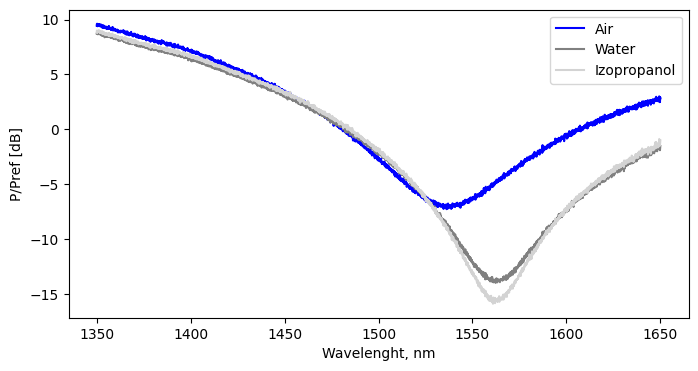

In [14]:
# ploting of data from Sensor06 readouts

fig, ax = plt.subplots(figsize=(8, 4))

ax.set_xlabel("Wavelenght, nm")
ax.set_ylabel("P/Pref [dB]")

ax.plot(air06['Wavelenght [nm]'], air06['Amplitude'], color = 'blue', label = 'Air')
ax.plot(water06['Wavelenght [nm]'], water06['Amplitude'], color = 'grey', label = 'Water')
ax.plot(izopropanol06['Wavelenght [nm]'], izopropanol06['Amplitude'], color = 'lightgrey', label = 'Izopropanol')

ax.legend()

plt.show()


For modeling, I will use data from 8 sensors (numbered as sensor1-sensor8); 2 of them I will use for deployment.

Sensor ID will be added to dataframes as a new column, however it would be not used as parameter for modelling.

In [111]:
#NOTE: A function for generatig of the dataframes with extraction of Sensor ID in 'Sensor_ID' column from the file path.
'''
Function generating dataframe from list of files with extracted sensor ID in 'Sensor_ID' column from the file path

returns df

Define file path and name of your dataframe 
example of file path: air_path = sorted(glob.glob(data_folder + '*0[0-8]_air.txt'))

'''

def generate_dataframes(file_path, df_name):

    files = []

    for filename in file_path:
        df = pd.read_csv(filename, header=None, index_col=None)
        mod_df(df)
        df['Data_path']=filename
        df = df.astype({'Data_path':'string'})
        df['SensorID'] = df['Data_path'].str.extract(pat='(sensor[0-9][0-9])', expand=True)
        df = df.drop(columns=['Data_path'])
        df = df[['SensorID'] + list(df.columns[:-1])]
        files.append(df)

    df_name = pd.concat(files, axis=0, ignore_index=True)
    return df_name



In [112]:
air_path = sorted(glob.glob(data_folder + '*0[0-8]_air.txt'))

air_df = generate_dataframes(air_path, 'air_df')
air_df




SensorID  Wavelenght [nm]  Amplitude
0      sensor01           1350.0     9.1792
1      sensor01           1350.1     9.2003
2      sensor01           1350.2     9.1968
3      sensor01           1350.3     9.1028
4      sensor01           1350.4     9.0601
...         ...              ...        ...
24003  sensor08           1649.6     3.7791
24004  sensor08           1649.7     3.6568
24005  sensor08           1649.8     3.7064
24006  sensor08           1649.9     3.7920
24007  sensor08           1650.0     4.0038

[24008 rows x 3 columns]

In [17]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24008 entries, 0 to 24007
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SensorID         24008 non-null  string 
 1   Wavelenght [nm]  24008 non-null  float64
 2   Amplitude        24008 non-null  float64
dtypes: float64(2), string(1)
memory usage: 562.8 KB


In [18]:
water_files = sorted(glob.glob(data_folder + '*0[0-8]_water.txt'))


water_df = generate_dataframes(water_files, 'water_df')
water_df

SensorID  Wavelenght [nm]  Amplitude
0      sensor01           1350.0    8.35700
1      sensor01           1350.1    8.42870
2      sensor01           1350.2    8.44220
3      sensor01           1350.3    8.41440
4      sensor01           1350.4    8.40340
...         ...              ...        ...
24003  sensor08           1649.6   -0.47930
24004  sensor08           1649.7   -0.51990
24005  sensor08           1649.8   -0.77034
24006  sensor08           1649.9   -0.40282
24007  sensor08           1650.0   -0.28101

[24008 rows x 3 columns]

In [19]:
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24008 entries, 0 to 24007
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SensorID         24008 non-null  string 
 1   Wavelenght [nm]  24008 non-null  float64
 2   Amplitude        24008 non-null  float64
dtypes: float64(2), string(1)
memory usage: 562.8 KB


In [20]:
izopropanol_files = sorted(glob.glob(data_folder + '*0[0-8]_izopropanol.txt'))

izopropanol_df = generate_dataframes(izopropanol_files, 'izopropanol_df')
izopropanol_df

SensorID  Wavelenght [nm]  Amplitude
0      sensor01           1350.0   8.555100
1      sensor01           1350.1   8.675000
2      sensor01           1350.2   8.711600
3      sensor01           1350.3   8.715700
4      sensor01           1350.4   8.679200
...         ...              ...        ...
24003  sensor08           1649.6  -0.179920
24004  sensor08           1649.7  -0.329130
24005  sensor08           1649.8  -0.503520
24006  sensor08           1649.9  -0.042660
24007  sensor08           1650.0   0.063801

[24008 rows x 3 columns]

In [21]:
izopropanol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24008 entries, 0 to 24007
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SensorID         24008 non-null  string 
 1   Wavelenght [nm]  24008 non-null  float64
 2   Amplitude        24008 non-null  float64
dtypes: float64(2), string(1)
memory usage: 562.8 KB


<h3>Plotting of data <h3>

In [22]:
'''

define dataframe to plot - set of collected sensors readouts in one environment

function ables to plot Wavelenght and amplitude of each sensor in selected environment

'''

def spectrum_plot(data):

    fig, ax = plt.subplots(figsize=(10,6))
    sensors = list(data.SensorID.unique())
    for s in sensors:
        df = data.loc[data['SensorID'] == s]
        ax.plot(df['Wavelenght [nm]'], df['Amplitude'])
    ax.set_xlabel("Wavelenght, nm")
    ax.set_ylabel("P/Pref [dB]")
    return

plt.show()

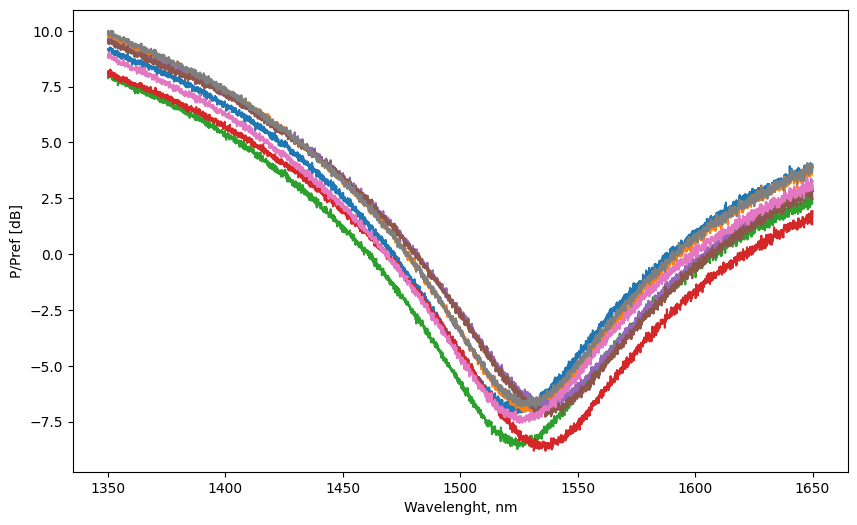

In [23]:
spectrum_plot(air_df)

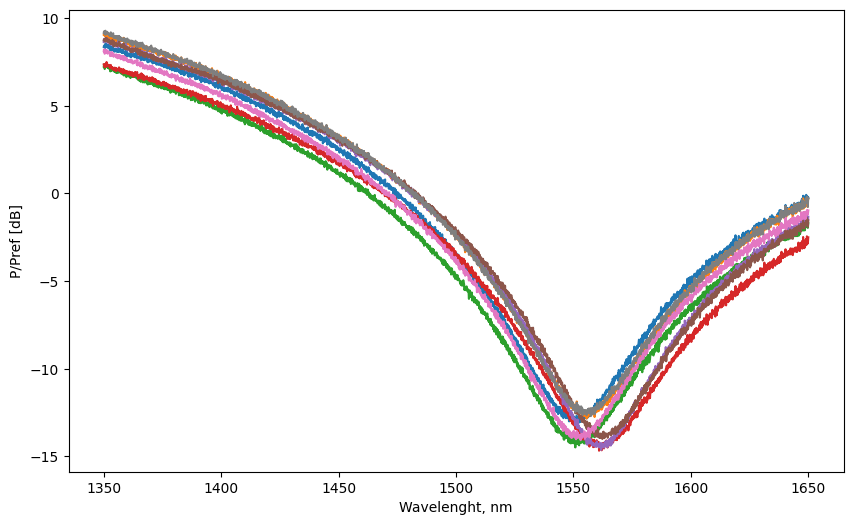

In [24]:
spectrum_plot(water_df)

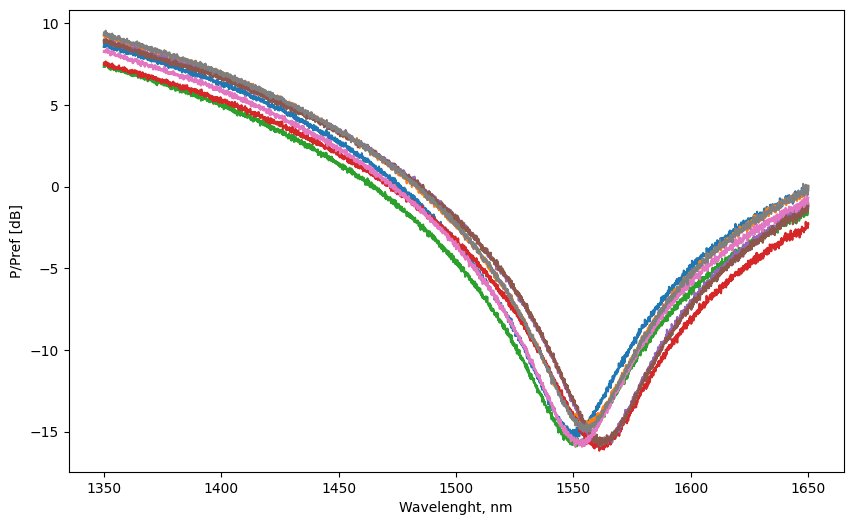

In [25]:
spectrum_plot(izopropanol_df)

<h1>3. Models</h1>

<h2>3.1. Merging data into big dataframe</h2>

Data will be merged with Wavelenght and Sensor ID as keys

In [26]:
# Rename of columns -> clarifying of data after merging

air_df = air_df.rename(columns={'Amplitude' : 'Amplitude in air'})
water_df = water_df.rename(columns={'Amplitude' : 'Amplitude in water'})
izopropanol_df = izopropanol_df.rename(columns={'Amplitude' : 'Amplitude in izopropanol'})


# Dataframe for readouts in the air and in water
data01 = air_df.merge(water_df, on=('SensorID','Wavelenght [nm]'))
data01

SensorID  Wavelenght [nm]  Amplitude in air  Amplitude in water
0      sensor01           1350.0            9.1792             8.35700
1      sensor01           1350.1            9.2003             8.42870
2      sensor01           1350.2            9.1968             8.44220
3      sensor01           1350.3            9.1028             8.41440
4      sensor01           1350.4            9.0601             8.40340
...         ...              ...               ...                 ...
24003  sensor08           1649.6            3.7791            -0.47930
24004  sensor08           1649.7            3.6568            -0.51990
24005  sensor08           1649.8            3.7064            -0.77034
24006  sensor08           1649.9            3.7920            -0.40282
24007  sensor08           1650.0            4.0038            -0.28101

[24008 rows x 4 columns]

In [27]:
# Dataframe for readouts in the air and izopropanol

data02 = air_df.merge(izopropanol_df, on=('SensorID', 'Wavelenght [nm]'))
data02

SensorID  Wavelenght [nm]  Amplitude in air  Amplitude in izopropanol
0      sensor01           1350.0            9.1792                  8.555100
1      sensor01           1350.1            9.2003                  8.675000
2      sensor01           1350.2            9.1968                  8.711600
3      sensor01           1350.3            9.1028                  8.715700
4      sensor01           1350.4            9.0601                  8.679200
...         ...              ...               ...                       ...
24003  sensor08           1649.6            3.7791                 -0.179920
24004  sensor08           1649.7            3.6568                 -0.329130
24005  sensor08           1649.8            3.7064                 -0.503520
24006  sensor08           1649.9            3.7920                 -0.042660
24007  sensor08           1650.0            4.0038                  0.063801

[24008 rows x 4 columns]

In [28]:
data_all = data01.merge(izopropanol_df, on=('SensorID', 'Wavelenght [nm]'))
data_all

SensorID  Wavelenght [nm]  Amplitude in air  Amplitude in water  \
0      sensor01           1350.0            9.1792             8.35700   
1      sensor01           1350.1            9.2003             8.42870   
2      sensor01           1350.2            9.1968             8.44220   
3      sensor01           1350.3            9.1028             8.41440   
4      sensor01           1350.4            9.0601             8.40340   
...         ...              ...               ...                 ...   
24003  sensor08           1649.6            3.7791            -0.47930   
24004  sensor08           1649.7            3.6568            -0.51990   
24005  sensor08           1649.8            3.7064            -0.77034   
24006  sensor08           1649.9            3.7920            -0.40282   
24007  sensor08           1650.0            4.0038            -0.28101   

       Amplitude in izopropanol  
0                      8.555100  
1                      8.675000  
2                      8.711600  
3                      8.715700  
4                      8.679200  
...                         ...  
24003                 -0.179920  
24004                 -0.329130  
24005                 -0.503520  
24006                 -0.042660  
24007                  0.063801  

[24008 rows x 5 columns]

Data in column 'Wavelenght [nm]' will be converted to reach 1.XX values

In [29]:
data_all['Wavelenght_units'] = data_all['Wavelenght [nm]'] / 1000
data_all

SensorID  Wavelenght [nm]  Amplitude in air  Amplitude in water  \
0      sensor01           1350.0            9.1792             8.35700   
1      sensor01           1350.1            9.2003             8.42870   
2      sensor01           1350.2            9.1968             8.44220   
3      sensor01           1350.3            9.1028             8.41440   
4      sensor01           1350.4            9.0601             8.40340   
...         ...              ...               ...                 ...   
24003  sensor08           1649.6            3.7791            -0.47930   
24004  sensor08           1649.7            3.6568            -0.51990   
24005  sensor08           1649.8            3.7064            -0.77034   
24006  sensor08           1649.9            3.7920            -0.40282   
24007  sensor08           1650.0            4.0038            -0.28101   

       Amplitude in izopropanol  Wavelenght_units  
0                      8.555100            1.3500  
1                      8.675000            1.3501  
2                      8.711600            1.3502  
3                      8.715700            1.3503  
4                      8.679200            1.3504  
...                         ...               ...  
24003                 -0.179920            1.6496  
24004                 -0.329130            1.6497  
24005                 -0.503520            1.6498  
24006                 -0.042660            1.6499  
24007                  0.063801            1.6500  

[24008 rows x 6 columns]

<h2>3.2. Splitting data into train and test set </h2>

In [90]:
# determination of dependent and independent variables


X = data_all[['Wavelenght_units', 'Amplitude in air']] # independent variable will be the same for water and izopropanol models
y_water = data_all['Amplitude in water']
y_izo = data_all['Amplitude in izopropanol']



In [91]:
# Split for model in water
X_water_train, X_water_test, y_water_train, y_water_test = train_test_split(X,y_water,test_size=0.2,random_state=40)

#Split for model in izopropanol
X_izo_train, X_izo_test, y_izo_train, y_izo_test = train_test_split(X,y_izo,test_size=0.2,random_state=111)


We should find model with the best fit to training data (R2 nearest to 1, lowest MAE, MSE and RMSE).
Predictions will be always in the same wavelenhgt range.


<h2>3.3. MODEL: polynominal regression</h2>

In [33]:
# Collecting of models metrics

metrics = pd.DataFrame(columns=['Model', 'Dataset', 'R2','MAE', 'MSE', 'RMSE'])
metrics

Empty DataFrame
Columns: [Model, Dataset, R2, MAE, MSE, RMSE]
Index: []

<h3>3.3a. Water polynominal regression </h3>

plotted data showed, that the regression is nonlinear.



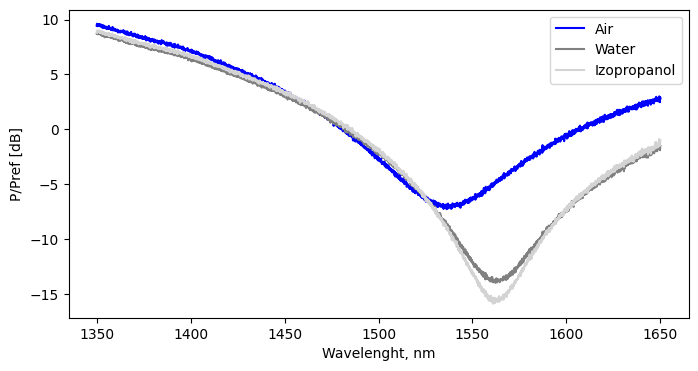

<h4>3.3a (WATER).1) polynominal regression model with degree=3 </h4>


In [34]:
def poly_reg_model(X, y, poly_degree, filename):
    
    '''
    
    Function that fits polynominal regression model of X and y data with polynomial degree = poly_degree and predicts data.
    
    Function prints characteristic of polynomial regression (coefficients) and returns scores of the model (R2, MAE MSE, RMSE)
    
    Function saves the model to a file.
    
    Determine training X and training y and polynominal degree, and filename, which is the name of the file where the model will be saved.
    
    X : X training data; variable
    y: y training data, variable
    poly_degree: int, polynomial degree
    filename: string, name of the file where the model will be saved
    
    '''
    
    # transformation X
    poly = PolynomialFeatures(degree=poly_degree) 
    X_poly = poly.fit_transform(X)

    # model fitting
    model = LinearRegression()
    model_fit = model.fit(X_poly, y)

    print(f'Polynominal regression model with degree {poly_degree} function is characterized with COEFFICIENTS: {model.coef_}')

    #save model to file
    
    filename = filename + '.pkl'
    # serialize (save) the object, in this case "model"
    pickle.dump(model, open(filename, 'wb'))
    
    return model_fit, model.score(X_poly, y)

In [35]:
water_poly3 = poly_reg_model(X=X_water_train, y=y_water_train, poly_degree=3, filename='water_poly3_model')



Polynominal regression model with degree 3 function is characterized with COEFFICIENTS: [ 0.00000000e+00  1.39291008e+04 -2.34097361e+01 -9.32221341e+03
  2.11286885e+01  2.73834026e+00  2.06950416e+03 -3.36017940e+00
 -1.81563679e+00 -1.04281163e-02]


In [36]:
print(water_poly3)

(LinearRegression(), 0.9889393250199096)


In [37]:
#prediction with the saved model

def make_predictions(X, y, filename):
# determine X which is formatted to polynominal function

# de-serialize (load) the object
    filename = filename + '.pkl'
    imported_model = pickle.load(open(filename, 'rb'))

# use the imported model (example)
    y_pred = imported_model.predict(X)

# print scatterplot of true values to predicted
    plt.scatter(y, y_pred)


    # parameters
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse= np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred)

    print('Parameters of model:')
    print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}')
    
    model = input('Enter the name of the model: ')
    dataset = input('Enter the name of the dataset: ')
    
    metrics_row = pd.DataFrame({'Model':model, 'Dataset':dataset, 'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}, index=[0])
    
    return mae, mse, rmse, r2, metrics_row

Parameters of model:
MAE: 0.49340485917854077, MSE: 0.4904440292264155, RMSE: 0.700317091913667, R2: 0.9885995403595245


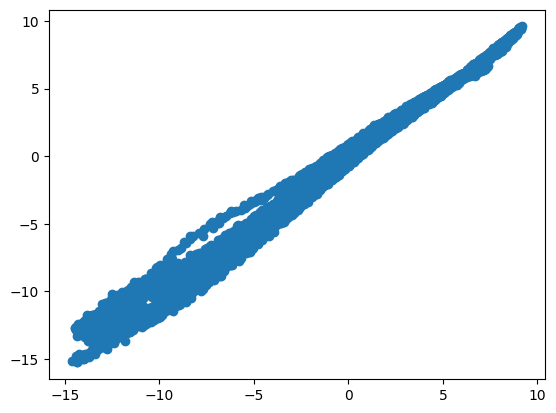

In [38]:
# PREDICTIONS OF WATER TEST SET, model: polymoninal regression with degree 3


poly = PolynomialFeatures(degree=3) 
X_poly_water_test = poly.fit_transform(X_water_test)

water_test_poly3_pred = make_predictions(X_poly_water_test, y_water_test, 'water_poly3_model')
mae, mse, rmse, r2, metrics_row = water_test_poly3_pred



In [39]:
metrics = pd.concat([metrics, metrics_row], axis=0, ignore_index=True)
metrics


Model Dataset      R2       MAE       MSE      RMSE
0  water_poly3    test  0.9886  0.493405  0.490444  0.700317

Parameters of model:
MAE: 0.495498157545461, MSE: 0.48562805622760535, RMSE: 0.6968701860659597, R2: 0.9889393250199096


Model Dataset        R2       MAE       MSE      RMSE
0  water_poly3    test  0.988600  0.493405  0.490444  0.700317
1  water_poly3   train  0.988939  0.495498  0.485628  0.696870

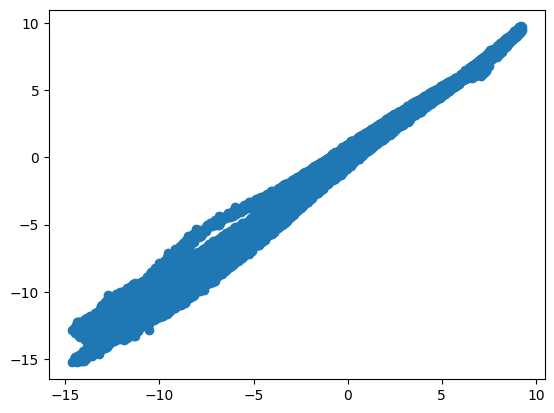

In [40]:
# PREDICTIONS OF WATER TRAIN SET, model: polymoninal regression with degree 3


poly = PolynomialFeatures(degree=3) 
X_poly_water_train = poly.fit_transform(X_water_train)

water_train_poly3_pred = make_predictions(X_poly_water_train, y_water_train, 'water_poly3_model')
mae, mse, rmse, r2, metrics_row = water_train_poly3_pred

metrics = pd.concat([metrics, metrics_row], axis=0, ignore_index=True)
metrics

<h4>3.3a (WATER).2) Polynominal regression model with degree tuning </h4>

In [41]:
 #Function to fit different models
from sklearn.pipeline import Pipeline

def fit_polynomials(X, y, from_=1, to_= 10, step=1):
  '''
  This function takes the explanatory (X) and response variables (y) and runs the data through a pipeline that fits Linear Regressions
  of different degrees (values specified by the user) and plot the results.
  Inputs:
  * from: int = initial degree for polynomial fit
  * to: int = final degree for polynomial fit
  * step:int = step to increase
  * X = explanatory variables
  * y = target variable

  Returns:
  score
  '''

  # Store scores and predictions
  scores = []

  # Loop between the specified values
  for n in range(from_, to_+1, step):
    # Steps
    steps = [
        ('Polynomial', PolynomialFeatures(degree=n)),
        ('model', LinearRegression())  ]
    
    # Pipeline fit
    fit_poly = Pipeline(steps).fit(X,y)
    # Predict
    poly_pred = fit_poly.predict(X)
    
    # y : y_predict scatter plot
    fig, ax = plt.subplots(figsize = (4, 4))
    ax.set_title("Prediction scatterplot for polynomial degree = " + str(n))
    ax.scatter(y, poly_pred)
    plt.show()
    
    # Evaluate
    model_score = fit_poly.score(X,y)
    model_mae = mean_absolute_error(y, poly_pred)
    model_mse = mean_squared_error(y, poly_pred)
    scores.append((n, model_score, model_mae, model_mse))

  return scores

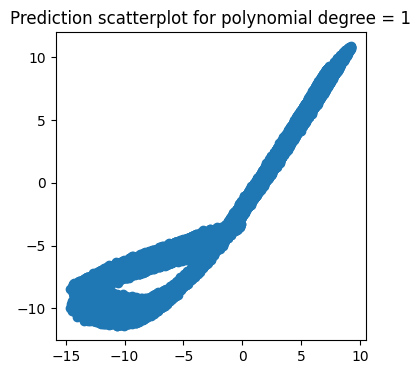

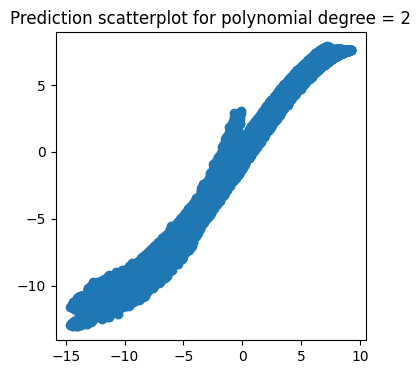

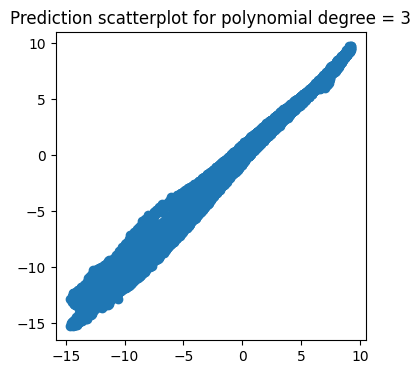

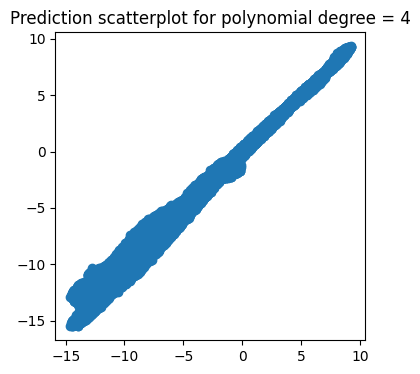

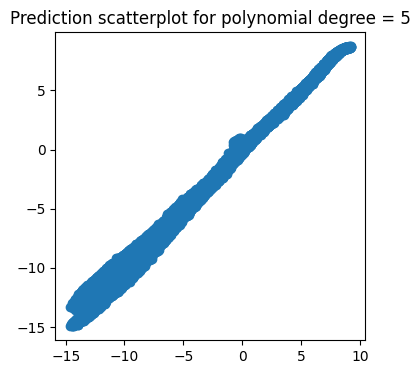

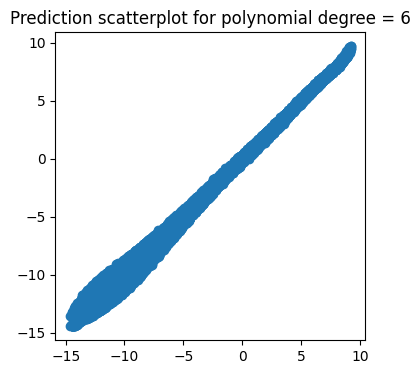

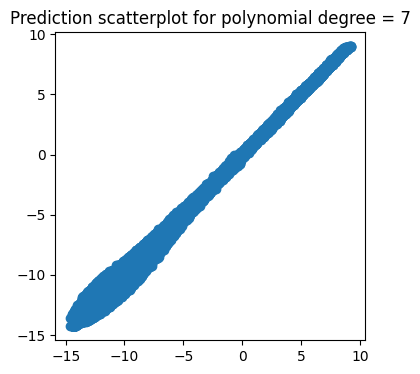

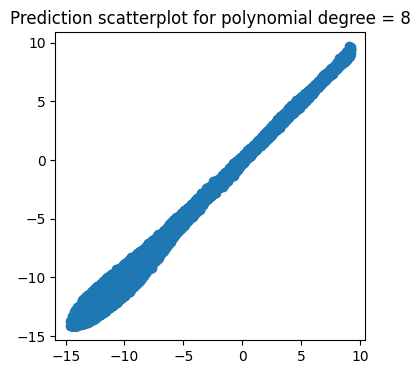

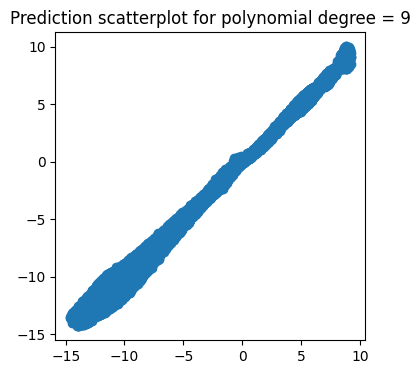

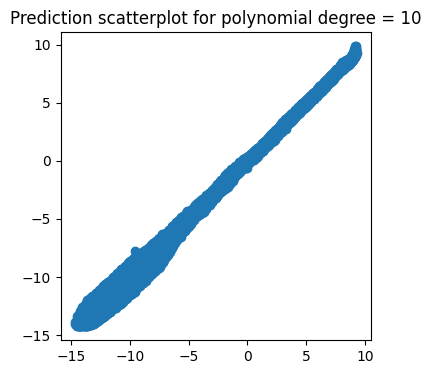

[(1, 0.8904593161756502, 1.7722253074903573, 4.809474056440134),
 (2, 0.9737675993808743, 0.83874817321295, 1.1517551818293825),
 (3, 0.9889393250199096, 0.495498157545461, 0.48562805622760535),
 (4, 0.9917927555655777, 0.41823378923114524, 0.3603458350279389),
 (5, 0.995467121532628, 0.3100762817184878, 0.19901976716504516),
 (6, 0.9965083311333846, 0.2613117619260162, 0.15330460100646018),
 (7, 0.996650483897358, 0.2521538097843345, 0.1470632666774031),
 (8, 0.9968247566069849, 0.2490906826765143, 0.13941167964659656),
 (9, 0.995655850608426, 0.32619785883349645, 0.19073346145600006),
 (10, 0.9968676206646768, 0.24459596663899696, 0.1375296978456241)]

In [42]:
fit_polynomials(X_water_train, y_water_train, 1, 10, 1)

The best score, MAE and MSE were obtained for polynominal degree = 8 and 10.

In [43]:
# make model of polynominal regression with degree = 8

# model training and saving:

water_poly8 = poly_reg_model(X=X_water_train, y=y_water_train, poly_degree=8, filename='water_poly8_model')


Polynominal regression model with degree 8 function is characterized with COEFFICIENTS: [-8.09458606e+00 -7.26339660e+05 -8.57663016e+05 -4.26979316e+05
  1.27720145e+06  6.65401423e+05  2.71057509e+05  4.05252265e+05
 -1.49284293e+06 -1.90825099e+05  5.69225957e+05 -1.07730930e+06
  5.99427263e+05  6.13892940e+05  3.66125637e+03  6.47254269e+02
 -5.63715813e+05  1.09242711e+06 -7.89517545e+05 -9.56620238e+03
 -1.78503540e+01 -6.56978882e+05  1.38713974e+06 -1.33171859e+06
  5.07408416e+05  9.37285864e+03  3.42768352e+01 -5.50048629e-02
  4.10172164e+05 -7.03416473e+05  5.57286025e+05 -1.62961643e+05
 -4.08145774e+03 -2.19023016e+01  7.87199599e-02  4.82622734e-04
 -7.53146862e+04  1.16969590e+05 -8.35647832e+04  2.09237977e+04
  6.66474921e+02  4.65594389e+00 -2.81079529e-02 -3.25392682e-04
  3.25675550e-07]


Parameters of model:
MAE: 0.2490906826765143, MSE: 0.13941167964659656, RMSE: 0.373378734861262, R2: 0.9968247566069849


Model Dataset        R2       MAE       MSE      RMSE
0  water_poly3    test  0.988600  0.493405  0.490444  0.700317
1  water_poly3   train  0.988939  0.495498  0.485628  0.696870
2  water_poly8   train  0.996825  0.249091  0.139412  0.373379

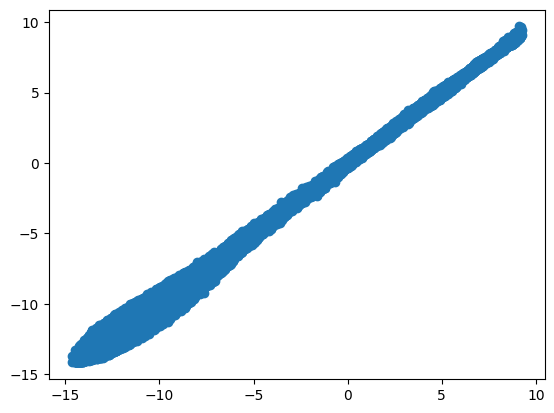

In [44]:
# train values predictions:
poly8 = PolynomialFeatures(degree=8)
X_water_poly8 = poly8.fit_transform(X_water_train)
water_poly8_train_pred = make_predictions(X_water_poly8, y_water_train, 'water_poly8_model')
mae, mse, rmse, r2, metrics_row = water_poly8_train_pred

metrics = pd.concat([metrics, metrics_row], axis=0, ignore_index=True)
metrics

Parameters of model:
MAE: 0.24230292248360016, MSE: 0.13197228259285884, RMSE: 0.3632798956629156, R2: 0.9969322805627088


Model Dataset        R2       MAE       MSE      RMSE
0  water_poly3    test  0.988600  0.493405  0.490444  0.700317
1  water_poly3   train  0.988939  0.495498  0.485628  0.696870
2  water_poly8   train  0.996825  0.249091  0.139412  0.373379
3  water_poly8    test  0.996932  0.242303  0.131972  0.363280

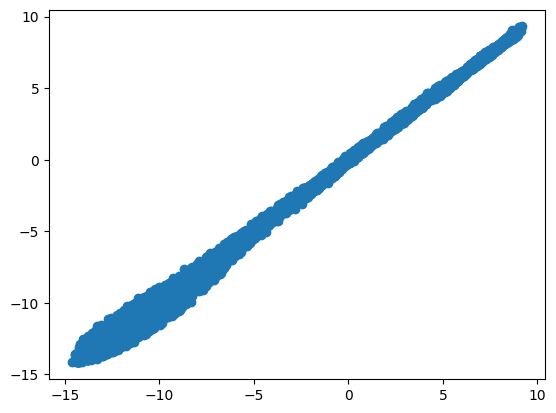

In [45]:
# test values predictions:
poly8 = PolynomialFeatures(degree=8)
X_water_poly8 = poly8.fit_transform(X_water_test)
water_poly8_test_pred = make_predictions(X_water_poly8, y_water_test, 'water_poly8_model')
mae, mse, rmse, r2, metrics_row = water_poly8_test_pred

metrics = pd.concat([metrics, metrics_row], axis=0, ignore_index=True)
metrics

<h3>3.3b. Izopropanol polynominal regressor</h3>

<h4>3.3b (IZOPROPANOL).1) Polynominal regression model with degree=3 </h4>

Polynominal regression model with degree 3 function is characterized with COEFFICIENTS: [ 0.00000000e+00  1.37556836e+04 -6.90606814e+01 -9.29128792e+03
  7.88318135e+01  3.50016681e+00  2.08029824e+03 -2.15257091e+01
 -2.31823460e+00 -1.28376778e-02]
Parameters of model:
MAE: 0.6081937587714128, MSE: 0.7888994333101104, RMSE: 0.8882001088212669, R2: 0.983961528735574


Model Dataset        R2       MAE       MSE      RMSE
0  water_poly3    test  0.988600  0.493405  0.490444  0.700317
1  water_poly3   train  0.988939  0.495498  0.485628  0.696870
2  water_poly8   train  0.996825  0.249091  0.139412  0.373379
3  water_poly8    test  0.996932  0.242303  0.131972  0.363280
4    izo_poly3   train  0.983962  0.608194  0.788899  0.888200

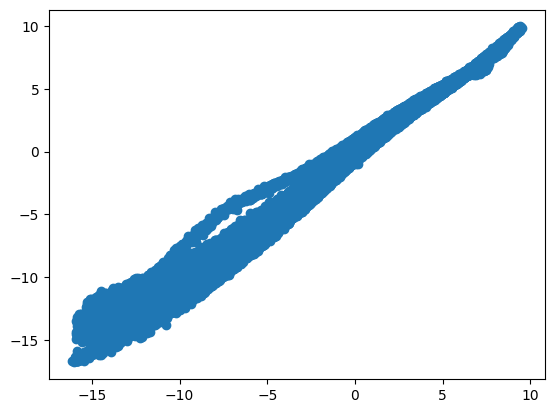

In [46]:
# model fit and save
izo_poly3 = poly_reg_model(X=X_izo_train, y=y_izo_train, poly_degree=3, filename='izo_poly3_model')

# PREDICTIONS OF IZO TRAIN SET, model: polymoninal regression with degree 3

poly = PolynomialFeatures(degree=3) 
X_poly_izo_train = poly.fit_transform(X_izo_train)

izo_train_poly3_pred = make_predictions(X_poly_izo_train, y_izo_train, 'izo_poly3_model')
mae, mse, rmse, r2, metrics_row = izo_train_poly3_pred


metrics = pd.concat([metrics, metrics_row], axis=0, ignore_index=True)
metrics

Parameters of model:
MAE: 0.5950658124276315, MSE: 0.7689418846090029, RMSE: 0.8768933142686189, R2: 0.98434085395067


Model Dataset        R2       MAE       MSE      RMSE
0  water_poly3    test  0.988600  0.493405  0.490444  0.700317
1  water_poly3   train  0.988939  0.495498  0.485628  0.696870
2  water_poly8   train  0.996825  0.249091  0.139412  0.373379
3  water_poly8    test  0.996932  0.242303  0.131972  0.363280
4    izo_poly3   train  0.983962  0.608194  0.788899  0.888200
5    izo_poly3    test  0.984341  0.595066  0.768942  0.876893

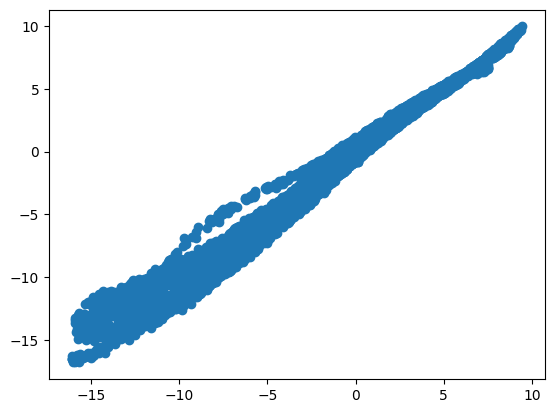

In [47]:
# PREDICTIONS OF IZO TEST SET, model: polymoninal regression with degree 3


poly = PolynomialFeatures(degree=3) 
X_poly_izo_test = poly.fit_transform(X_izo_test)

izo_test_poly3_pred = make_predictions(X_poly_izo_test, y_izo_test, 'izo_poly3_model')
mae, mse, rmse, r2, metrics_row = izo_test_poly3_pred


metrics = pd.concat([metrics, metrics_row], axis=0, ignore_index=True)
metrics


<h4>3.3b (IZOPROPANOL).2) Polynominal regression model with degree tuning </h4>

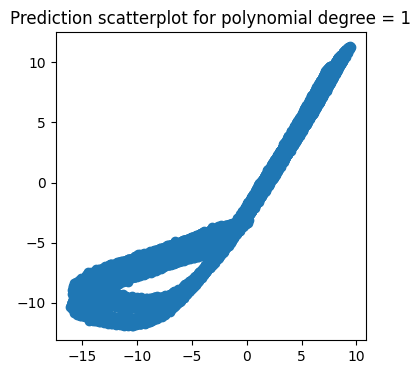

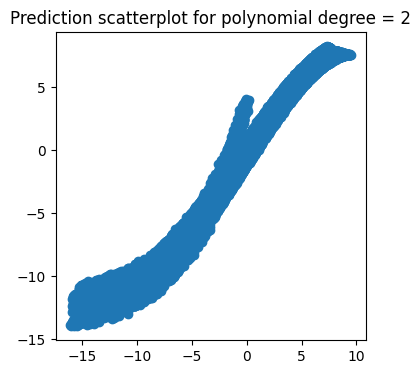

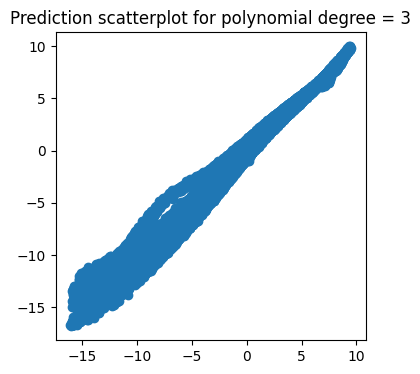

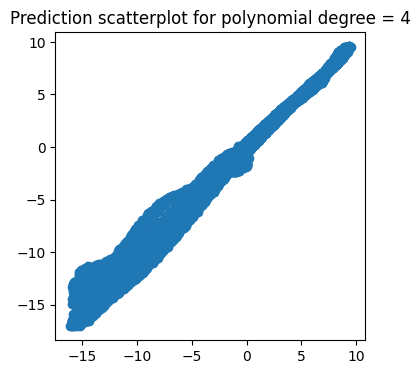

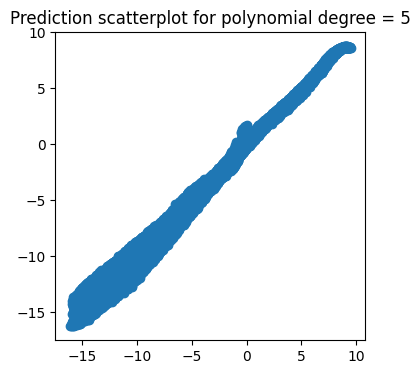

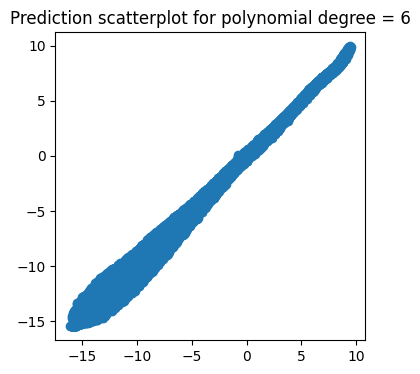

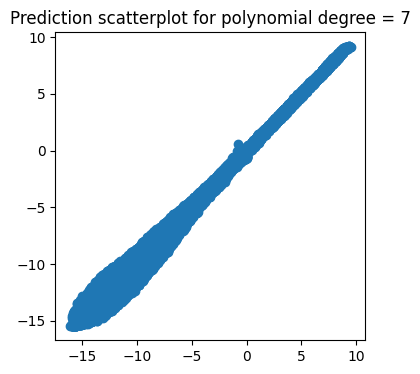

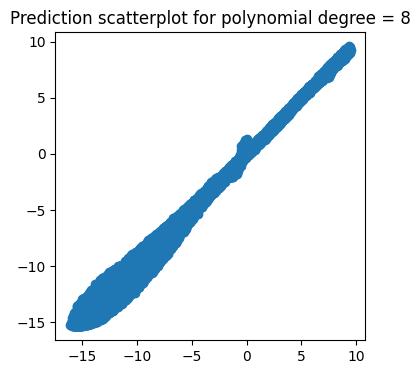

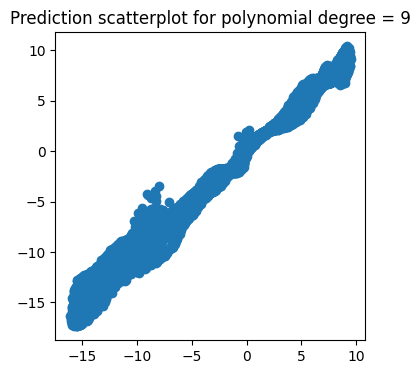

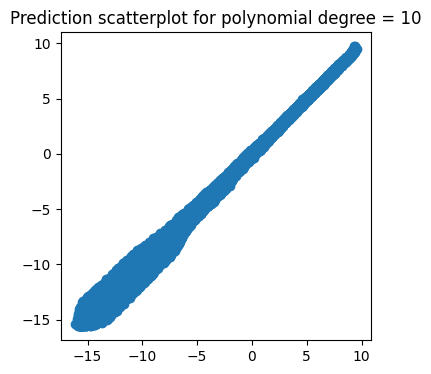

[(1, 0.8644877469401142, 2.055198713189703, 6.665569173206733),
 (2, 0.962325823859471, 1.0370672465764945, 1.8531152824777843),
 (3, 0.983961528735574, 0.6081937587714128, 0.7888994333101104),
 (4, 0.9872751208310692, 0.5305138549948749, 0.6259106494504442),
 (5, 0.9932551310828092, 0.3896724569632114, 0.3317662374920392),
 (6, 0.9951544900558849, 0.3058397440269011, 0.23834067387019017),
 (7, 0.9953275047113016, 0.2922575059271855, 0.22983043861382998),
 (8, 0.9955214951105561, 0.29301132781724193, 0.22028844963518443),
 (9, 0.9898180199261628, 0.537375115317605, 0.500830670067762),
 (10, 0.9959067369155684, 0.2685042926627144, 0.20133919713780524)]

In [48]:
fit_polynomials(X_izo_train, y_izo_train, 1, 10, 1)

For izopropanol dataset, polynominal regression model with degree = 8 and degree = 10 looks to be mostly accurate.

Model with degree = 10 will be used for predctions

<h4> 3.3b.2)B (IZOPROPANOL) predictions with polynominal regression degree=10</h4>

Polynominal regression model with degree 10 function is characterized with COEFFICIENTS: [ 2.04343692e+00  2.59475876e+03  6.45610266e+03  4.38994914e+03
  1.74657508e+03 -2.47262713e+02  4.31929624e+03 -2.35597664e+03
 -2.37824563e+03  5.87779598e+03  2.44194894e+03 -4.65912402e+03
 -1.90227624e+02 -8.58856302e+03  4.72815080e+03 -4.12249581e+02
 -3.88258636e+03  2.83533802e+03 -2.48739516e+03 -1.02101147e+04
 -2.51285531e+03 -2.66341278e+03  1.07732275e+02  2.67420513e+03
  6.85165494e+03  3.53597377e+03  7.77749412e+03  7.43636348e+01
 -2.52138894e+03  4.79842139e+03 -1.71154471e+03  3.29199483e+03
  7.86245054e+03 -9.59429011e+03 -1.89296722e+02 -4.89608457e-01
  2.73895245e+02  4.10148226e+03 -4.39609136e+03 -8.28279305e+03
 -8.91505612e+03  5.89469029e+03  1.80584178e+02  9.17312620e-01
 -2.49884291e-03  2.32839944e+03 -6.11651274e+03  3.90115730e+03
  4.16456220e+03  3.56094069e+03 -1.80310250e+03 -7.65203545e+01
 -5.72187940e-01  3.53911007e-03  3.27350706e-05 -8.31544015e+02
 

Model Dataset        R2       MAE       MSE      RMSE
0  water_poly3    test  0.988600  0.493405  0.490444  0.700317
1  water_poly3   train  0.988939  0.495498  0.485628  0.696870
2  water_poly8   train  0.996825  0.249091  0.139412  0.373379
3  water_poly8    test  0.996932  0.242303  0.131972  0.363280
4    izo_poly3   train  0.983962  0.608194  0.788899  0.888200
5    izo_poly3    test  0.984341  0.595066  0.768942  0.876893
6   izo_poly10   train  0.995907  0.268504  0.201339  0.448708

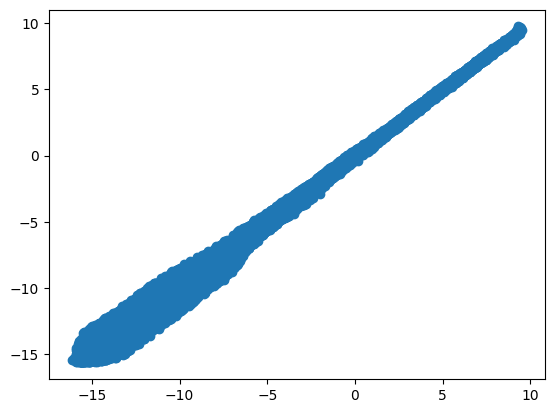

In [49]:
#training model and saving the model
izo_poly10 = poly_reg_model(X=X_izo_train, y=y_izo_train, poly_degree=10, filename='izo_poly10_model')

# PREDICTIONS OF IZO TRAIN SET, model: polymoninal regression with degree 3

poly = PolynomialFeatures(degree=10) 
X_poly_izo_train = poly.fit_transform(X_izo_train)

izo_train_poly10_pred = make_predictions(X_poly_izo_train, y_izo_train, 'izo_poly10_model')
mae, mse, rmse, r2, metrics_row = izo_train_poly10_pred


metrics = pd.concat([metrics, metrics_row], axis=0, ignore_index=True)
metrics

Parameters of model:
MAE: 0.26771935131579416, MSE: 0.20477279685636157, RMSE: 0.4525182834498089, R2: 0.9958298966448758


Model Dataset        R2       MAE       MSE      RMSE
0      water_poly3    test  0.988600  0.493405  0.490444  0.700317
1      water_poly3   train  0.988939  0.495498  0.485628  0.696870
2      water_poly8   train  0.996825  0.249091  0.139412  0.373379
3      water_poly8    test  0.996932  0.242303  0.131972  0.363280
4        izo_poly3   train  0.983962  0.608194  0.788899  0.888200
5        izo_poly3    test  0.984341  0.595066  0.768942  0.876893
6       izo_poly10   train  0.995907  0.268504  0.201339  0.448708
7  izo_poly10_test    test  0.995830  0.267719  0.204773  0.452518
8       izo_poly10    test  0.995830  0.267719  0.204773  0.452518

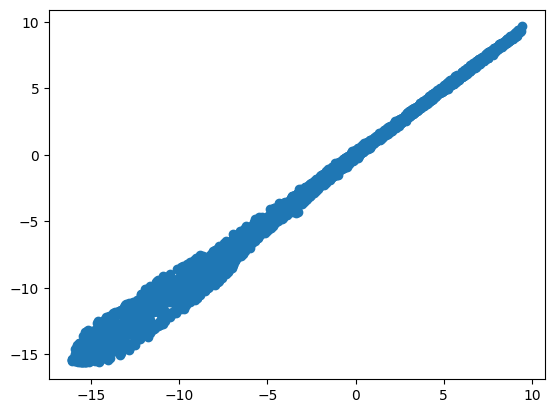

In [52]:
# predictions for test set

poly = PolynomialFeatures(degree=10) 
X_poly_izo_test = poly.fit_transform(X_izo_test)


izo_test_poly10_pred = make_predictions(X_poly_izo_test, y_izo_test, 'izo_poly10_model')
mae, mse, rmse, r2, metrics_row = izo_test_poly10_pred


metrics = pd.concat([metrics, metrics_row], axis=0, ignore_index=True)
metrics


<h2>3.4. MODEL: decision tree regression </h2>

<h3>3.4a. Water decision tree regression</h3>

<h4>3.4a.1) Decision Tree - without setting hyperparameters</h4>

In [53]:
# without hyperparameters
# model fit of water tree regression

model_dt = DecisionTreeRegressor(random_state=111)
model_dt.fit(X_water_train, y_water_train)




DecisionTreeRegressor(random_state=111)

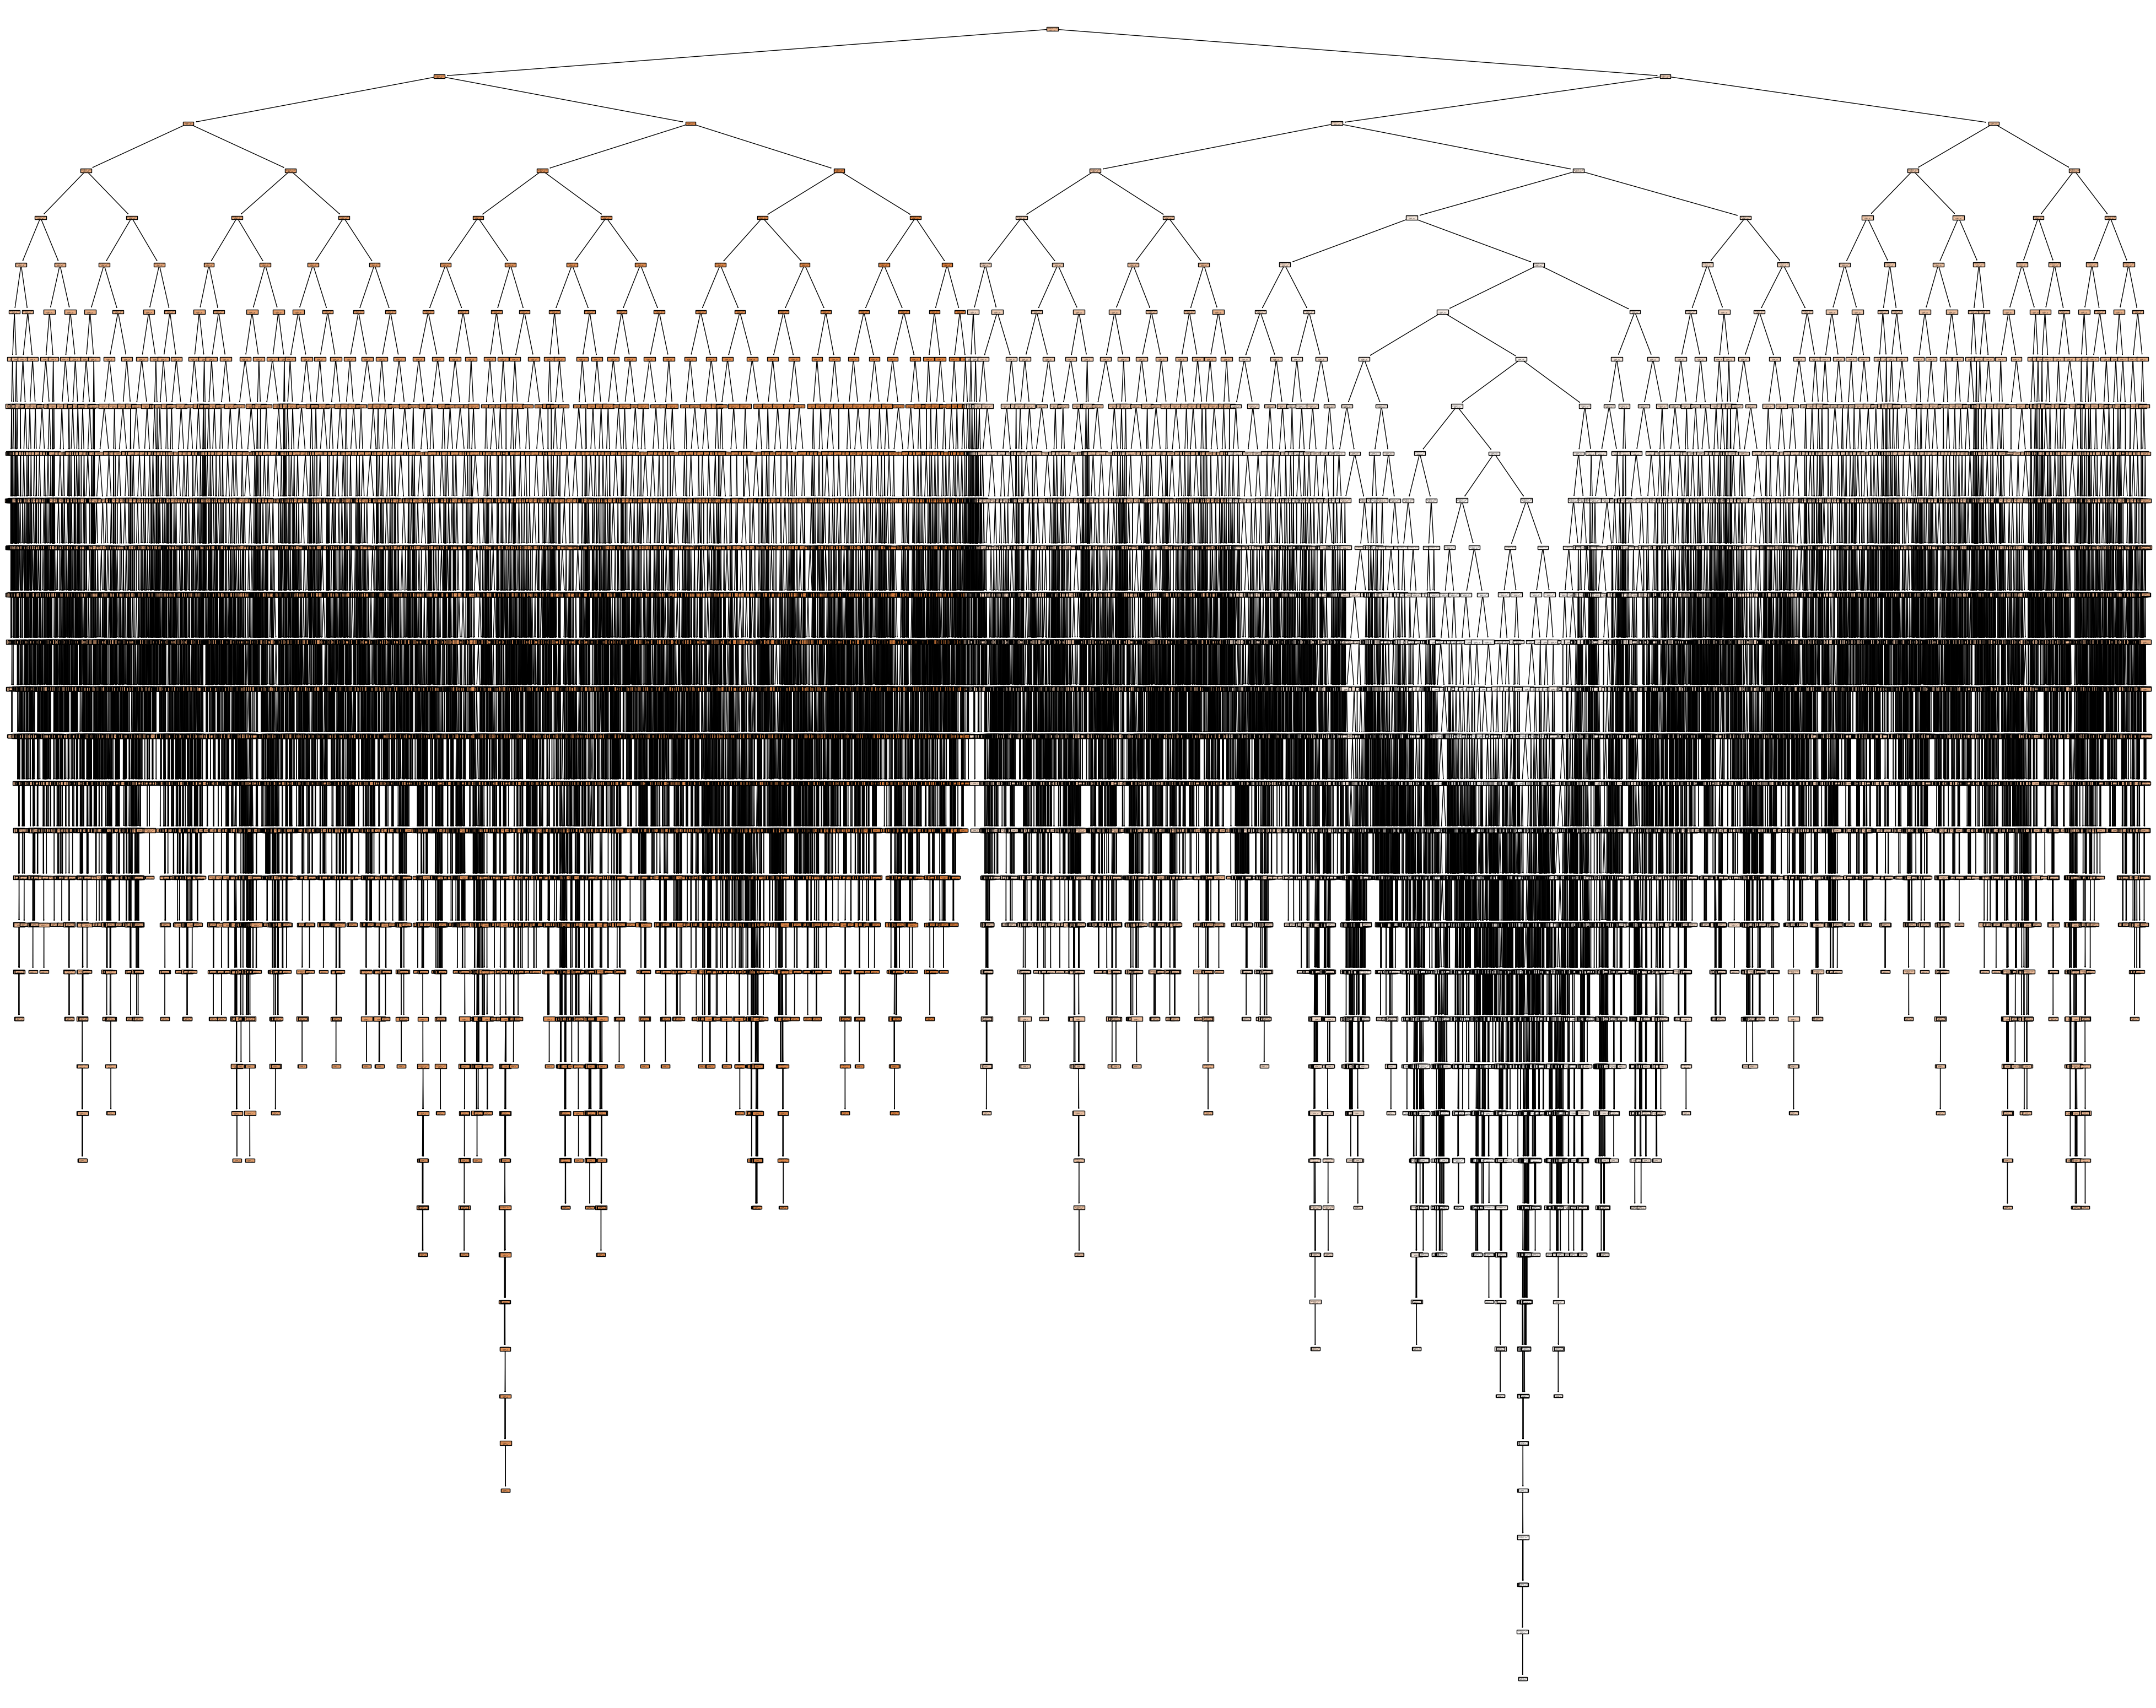

In [57]:
# plotting of the tree

fig = plt.figure(figsize=(50,40), dpi=100)
tree_fig = tree.plot_tree(model_dt,feature_names=X.columns, filled=True)


These model is too complicated and overfitted

<h4>3.4a.2) Decision Tree with set Max_depth=3</h4>

Max_depth =3 is based on the shape of Aplitude(Wavelenght) curve - there are 3 "events"

In [54]:
import pickle


def dec_tree_model(X, y, max_depth, filename):
    
    '''
    
    Function that fits decision tree regression model of X and y data with max_depth = max_depth.
    
    Function prints characteristic of regression (score)
    
    Function saves the model to a file.
    
    Determine training X and training y and max_depth, and filename, which is the name of the file where the model will be saved.
    
    X : X training data; variable
    y: y training data, variable
    max_depth: int, max_depth of the tree
    filename: string, name of the file where the model will be saved
    
    '''

    model_dt = DecisionTreeRegressor(random_state=111, max_depth=max_depth)
    model_dt.fit(X, y)


    # score of the model
    score = model_dt.score(X, y)
    
    # plotting of the tree

    fig = plt.figure(figsize=(50,40), dpi=100)
    tree_fig = tree.plot_tree(model_dt,feature_names=X.columns, filled=True)

    print(f'Decission tree regression model with max_depth={max_depth} is characterized with SCORE: {score}')

    #save model to file
    
    filename = filename + '.pkl'
    # serialize (save) the object, in this case "model"
    pickle.dump(model_dt, open(filename, 'wb'))
    
    return model_dt, score

Decission tree regression model with max_depth=3 is characterized with SCORE: 0.9432586242803133


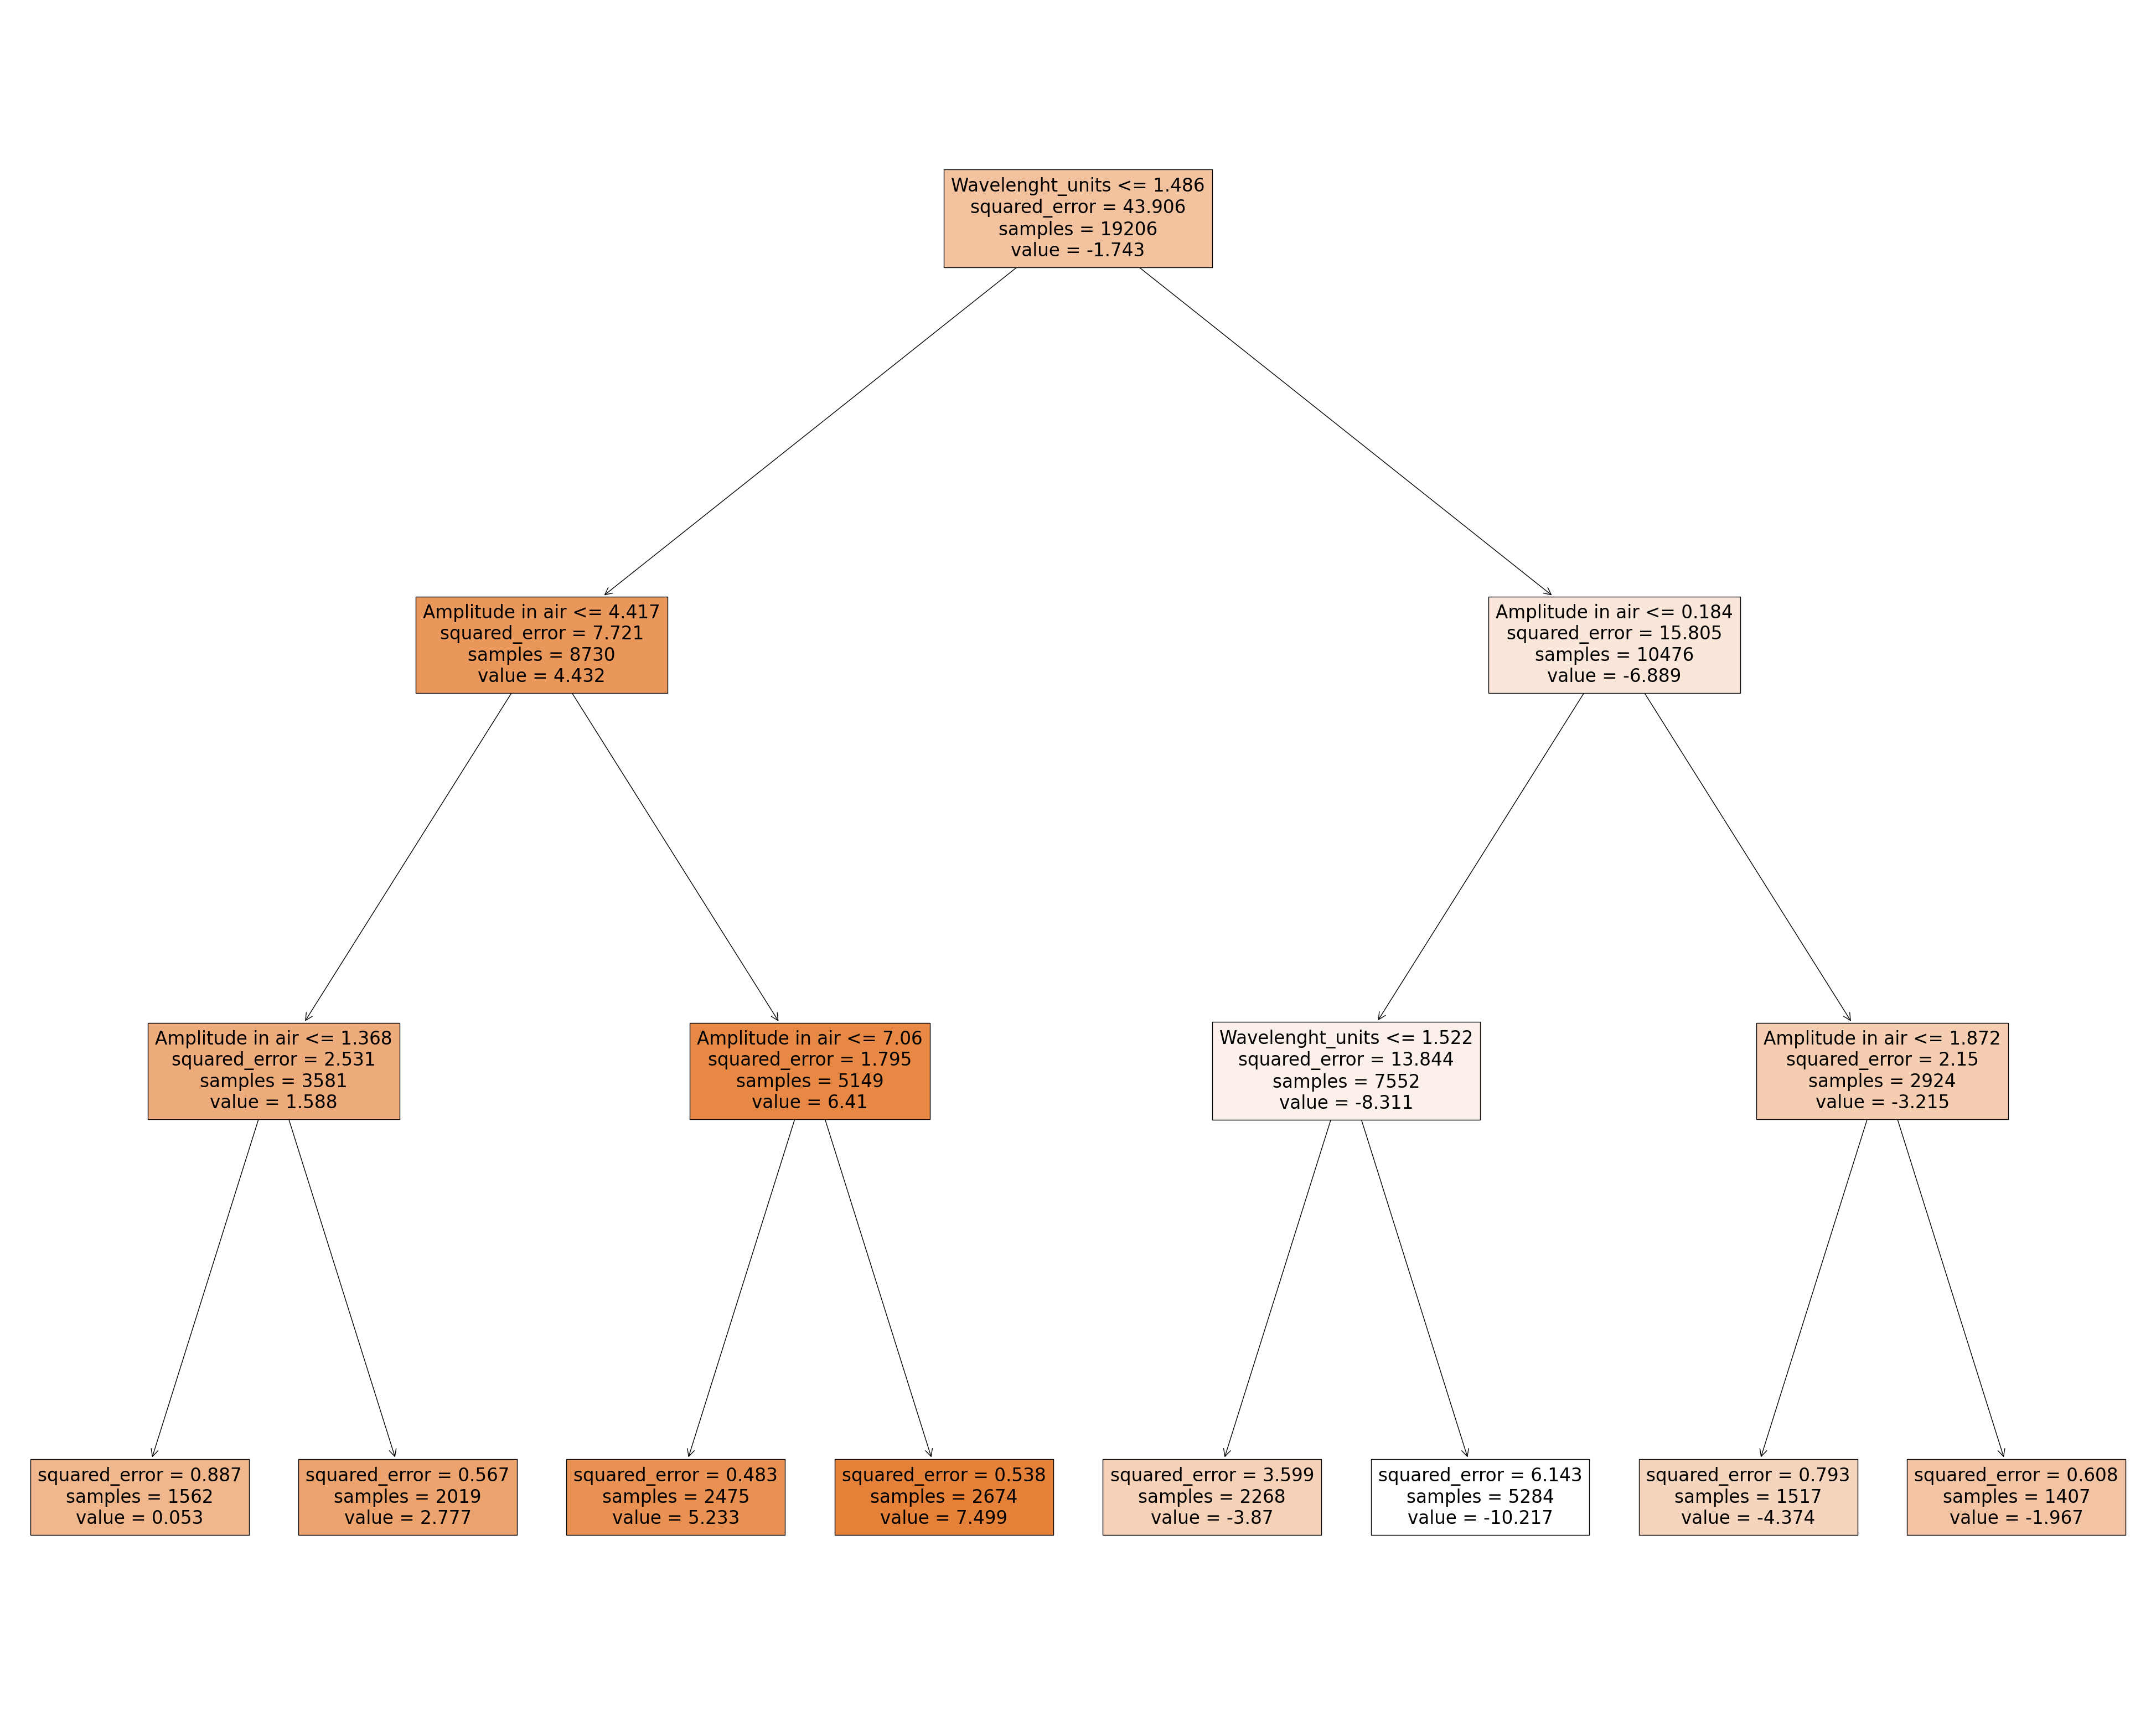

In [55]:
water_dt3 = dec_tree_model(X_water_train, y_water_train, 3, 'water_dt3_model')


Parameters of model:
MAE: 1.1786359303442415, MSE: 2.491276892959229, RMSE: 1.5783779309655939, R2: 0.9432586242803133


Model Dataset        R2       MAE       MSE      RMSE
0      water_poly3    test  0.988600  0.493405  0.490444  0.700317
1      water_poly3   train  0.988939  0.495498  0.485628  0.696870
2      water_poly8   train  0.996825  0.249091  0.139412  0.373379
3      water_poly8    test  0.996932  0.242303  0.131972  0.363280
4        izo_poly3   train  0.983962  0.608194  0.788899  0.888200
5        izo_poly3    test  0.984341  0.595066  0.768942  0.876893
6       izo_poly10   train  0.995907  0.268504  0.201339  0.448708
7  izo_poly10_test    test  0.995830  0.267719  0.204773  0.452518
8       izo_poly10    test  0.995830  0.267719  0.204773  0.452518
9        water_dt3   train  0.943259  1.178636  2.491277  1.578378

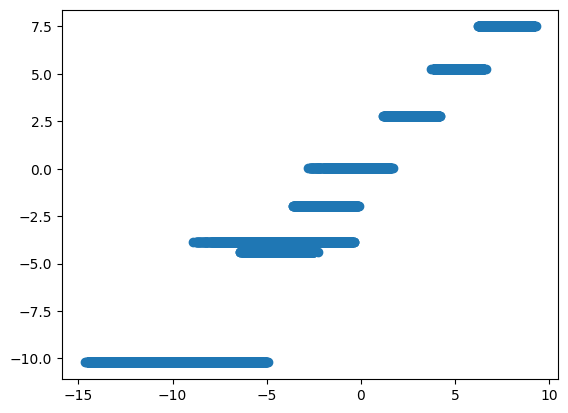

In [56]:
# predictions for Training Dataset

water_train_pred_dt3 = make_predictions(X_water_train, y_water_train, 'water_dt3_model')

mae, mse, rmse, r2, metrics_row = water_train_pred_dt3


metrics = pd.concat([metrics, metrics_row], axis=0, ignore_index=True)
metrics


Parameters of model:
MAE: 1.165746101001135, MSE: 2.4386301797468435, RMSE: 1.561611404846559, R2: 0.9433136030097026


Model Dataset        R2       MAE       MSE      RMSE
0       water_poly3    test  0.988600  0.493405  0.490444  0.700317
1       water_poly3   train  0.988939  0.495498  0.485628  0.696870
2       water_poly8   train  0.996825  0.249091  0.139412  0.373379
3       water_poly8    test  0.996932  0.242303  0.131972  0.363280
4         izo_poly3   train  0.983962  0.608194  0.788899  0.888200
5         izo_poly3    test  0.984341  0.595066  0.768942  0.876893
6        izo_poly10   train  0.995907  0.268504  0.201339  0.448708
7   izo_poly10_test    test  0.995830  0.267719  0.204773  0.452518
8        izo_poly10    test  0.995830  0.267719  0.204773  0.452518
9         water_dt3   train  0.943259  1.178636  2.491277  1.578378
10        water_dt3    test  0.943314  1.165746  2.438630  1.561611

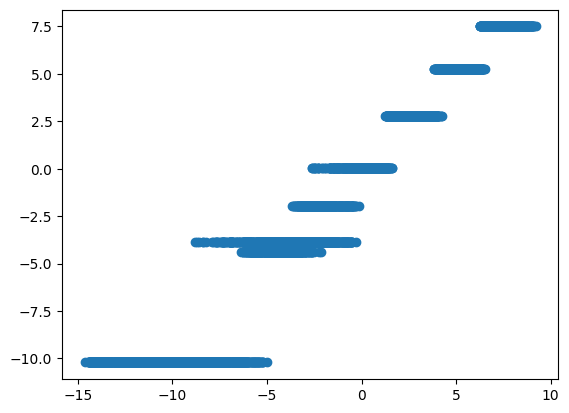

In [57]:
# predictions for test set

water_test_pred_dt3 = make_predictions(X_water_test, y_water_test, 'water_dt3_model')

mae, mse, rmse, r2, metrics_row = water_test_pred_dt3


metrics = pd.concat([metrics, metrics_row], axis=0, ignore_index=True)
metrics

<h4>3.4a.3) Decision tree - hyperparameter tuning with GridSearch</h4>

In [58]:
from sklearn.model_selection import GridSearchCV


gs = GridSearchCV(DecisionTreeRegressor(),
                  param_grid = {'max_depth': range(1, 10)
                                },
                  cv=20,
                  scoring='neg_mean_absolute_error')
gs.fit(X_water_train,y_water_train)

print(gs.best_params_)
print(gs.best_score_)


{'max_depth': 9}
-0.2314364899957086


Decission tree regression model with max_depth=9 is characterized with SCORE: 0.9970894996778542


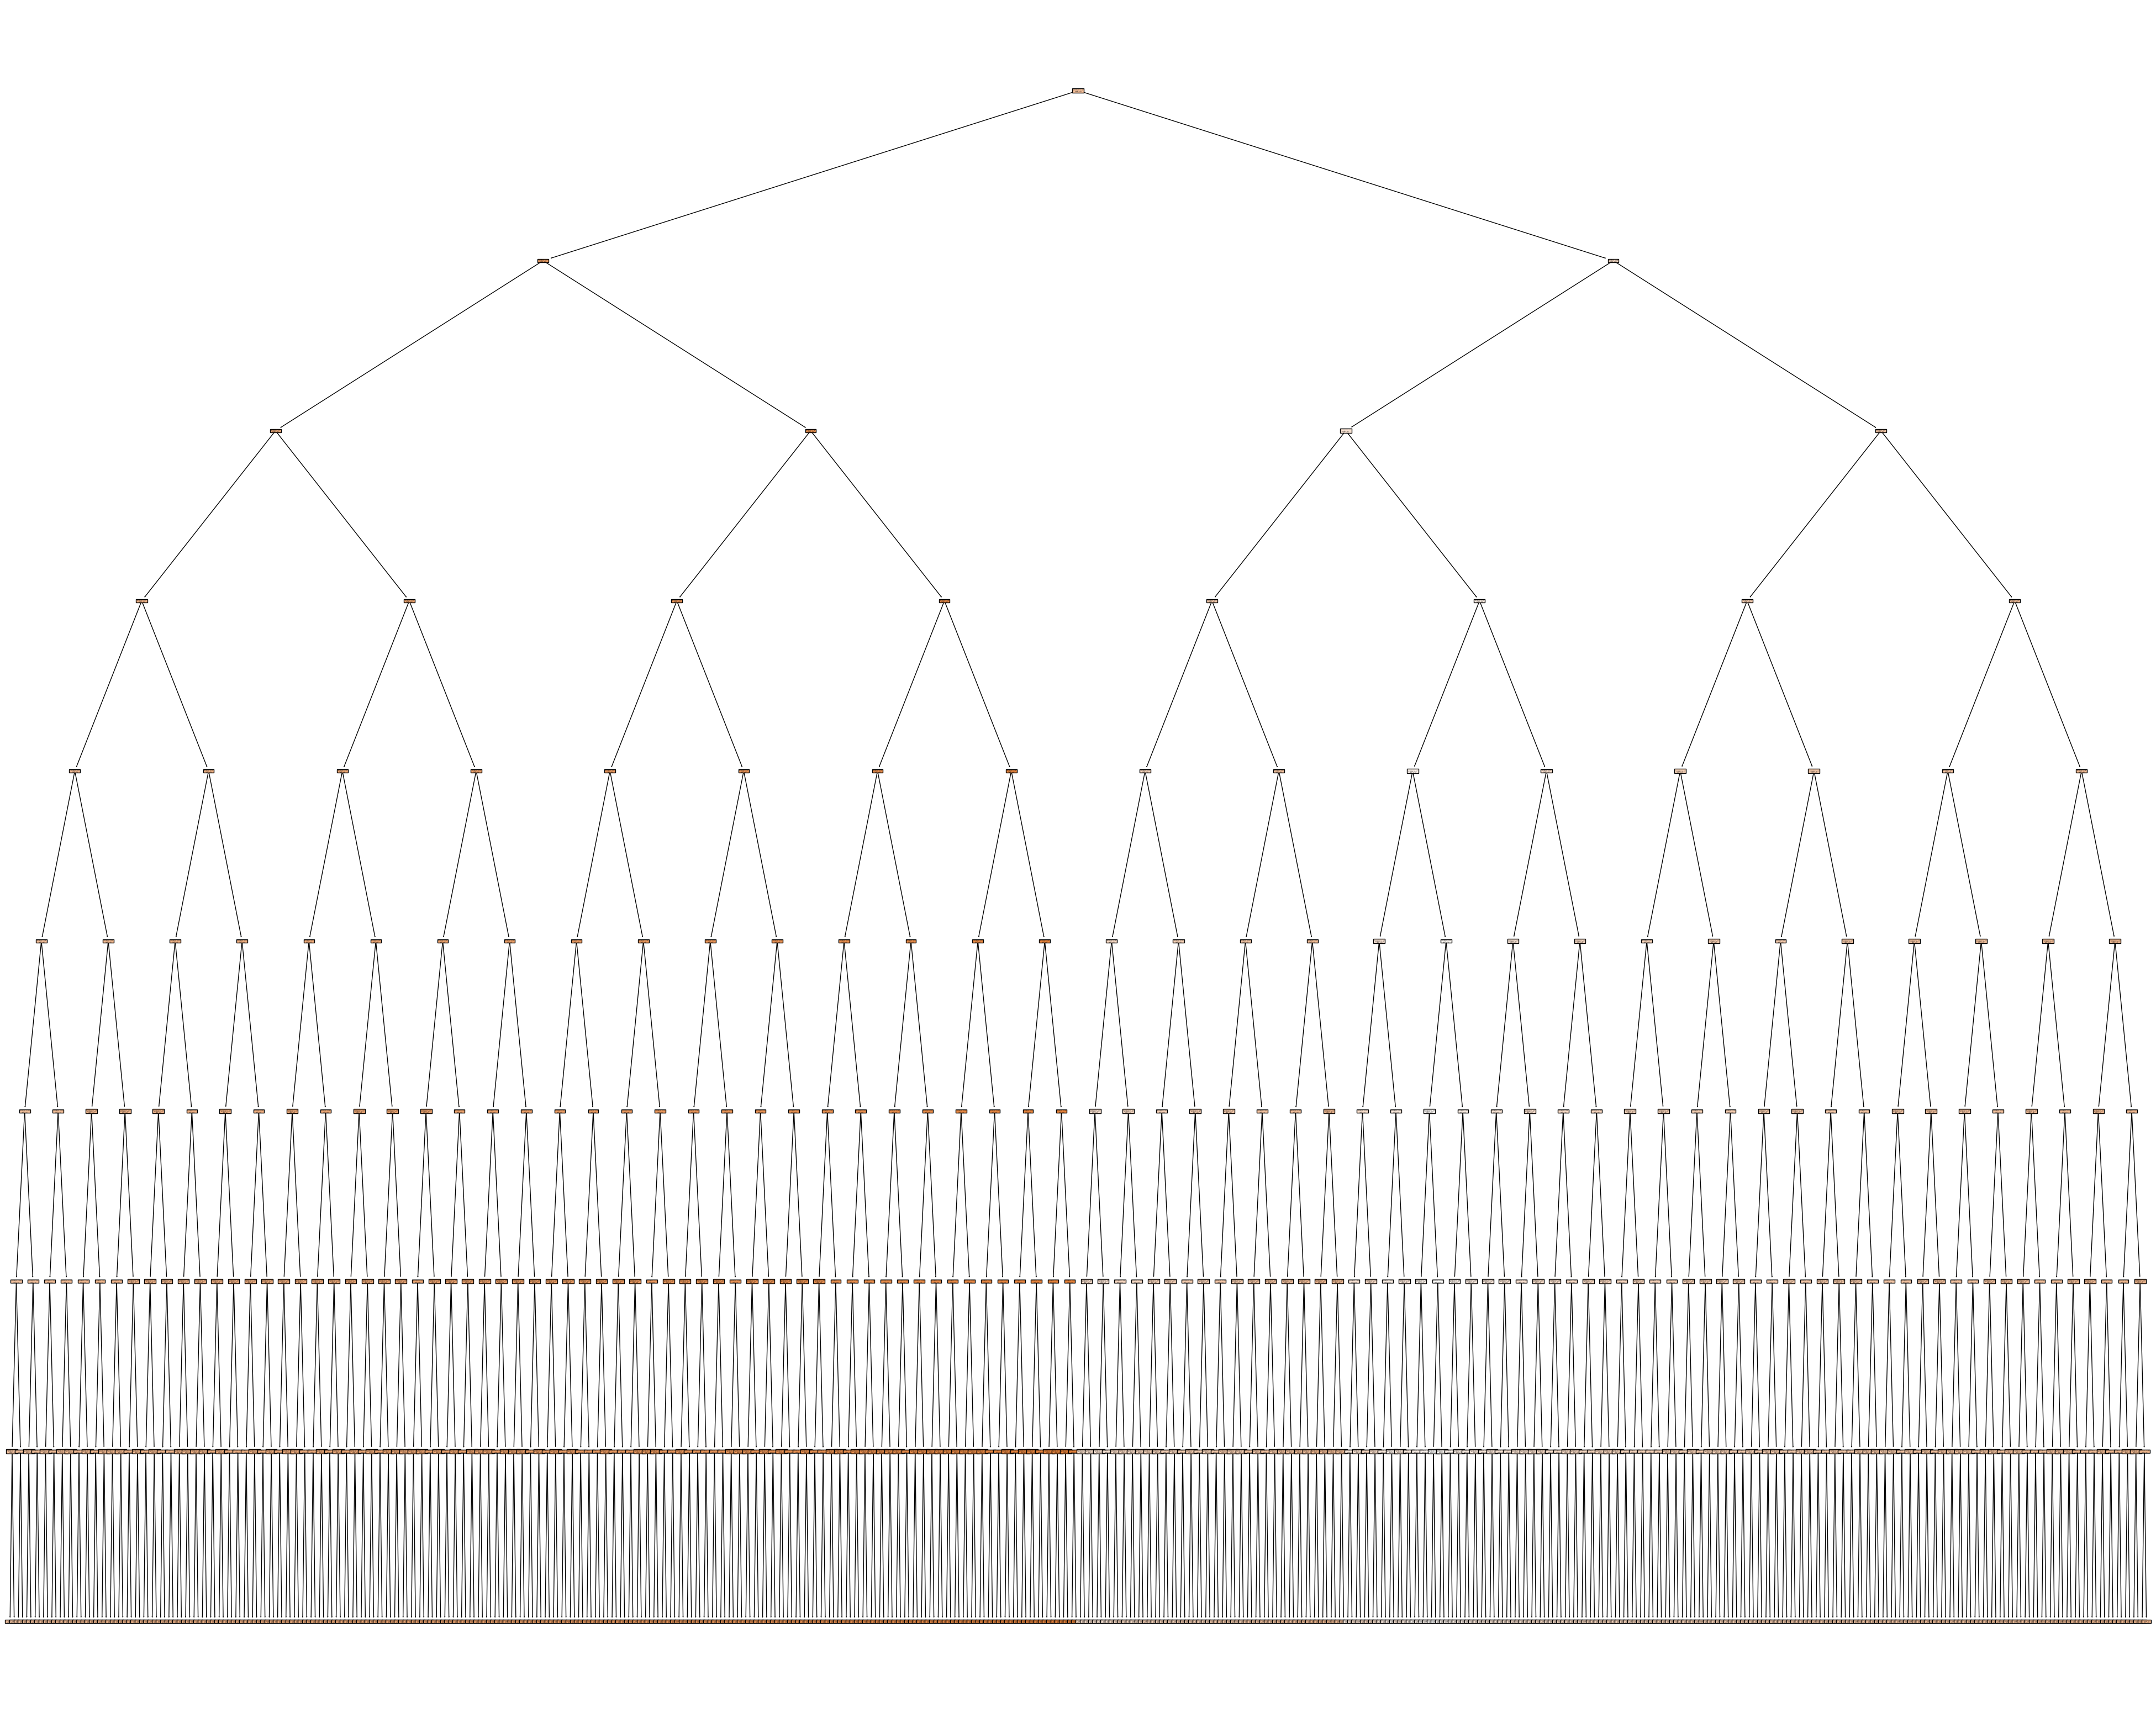

In [59]:
# fit decision tree model with GridSearch optimized max_depth=9 

water_dt9= dec_tree_model(X_water_train, y_water_train, 9, 'water_dt9_model')


Parameters of model:
MAE: 0.21100897819408815, MSE: 0.127787916798721, RMSE: 0.3574743582394701, R2: 0.9970894996778542


Model Dataset        R2       MAE       MSE      RMSE
0       water_poly3    test  0.988600  0.493405  0.490444  0.700317
1       water_poly3   train  0.988939  0.495498  0.485628  0.696870
2       water_poly8   train  0.996825  0.249091  0.139412  0.373379
3       water_poly8    test  0.996932  0.242303  0.131972  0.363280
4         izo_poly3   train  0.983962  0.608194  0.788899  0.888200
5         izo_poly3    test  0.984341  0.595066  0.768942  0.876893
6        izo_poly10   train  0.995907  0.268504  0.201339  0.448708
7   izo_poly10_test    test  0.995830  0.267719  0.204773  0.452518
8        izo_poly10    test  0.995830  0.267719  0.204773  0.452518
9         water_dt3   train  0.943259  1.178636  2.491277  1.578378
10        water_dt3    test  0.943314  1.165746  2.438630  1.561611
11        water_dt9   train  0.997089  0.211009  0.127788  0.357474

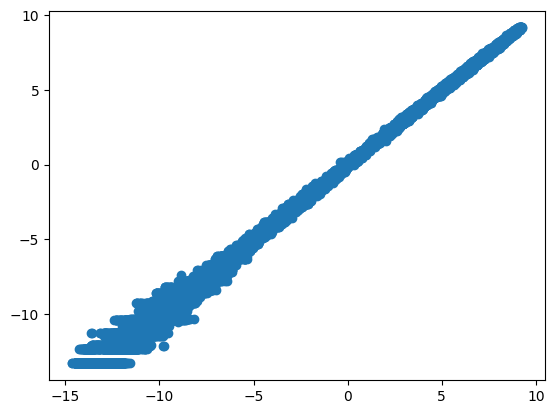

In [60]:
# make predictions on train data

water_train_pred_dt9 = make_predictions(X_water_train, y_water_train, 'water_dt9_model')
mae, mse, rmse, r2, metrics_row = water_train_pred_dt9


metrics = pd.concat([metrics, metrics_row], axis=0, ignore_index=True)
metrics

Parameters of model:
MAE: 0.2264217059508598, MSE: 0.14239112172916055, RMSE: 0.37734748141356467, R2: 0.9966900927736936


Model Dataset        R2       MAE       MSE      RMSE
0       water_poly3    test  0.988600  0.493405  0.490444  0.700317
1       water_poly3   train  0.988939  0.495498  0.485628  0.696870
2       water_poly8   train  0.996825  0.249091  0.139412  0.373379
3       water_poly8    test  0.996932  0.242303  0.131972  0.363280
4         izo_poly3   train  0.983962  0.608194  0.788899  0.888200
5         izo_poly3    test  0.984341  0.595066  0.768942  0.876893
6        izo_poly10   train  0.995907  0.268504  0.201339  0.448708
7   izo_poly10_test    test  0.995830  0.267719  0.204773  0.452518
8        izo_poly10    test  0.995830  0.267719  0.204773  0.452518
9         water_dt3   train  0.943259  1.178636  2.491277  1.578378
10        water_dt3    test  0.943314  1.165746  2.438630  1.561611
11        water_dt9   train  0.997089  0.211009  0.127788  0.357474
12        water_dt9    test  0.996690  0.226422  0.142391  0.377347

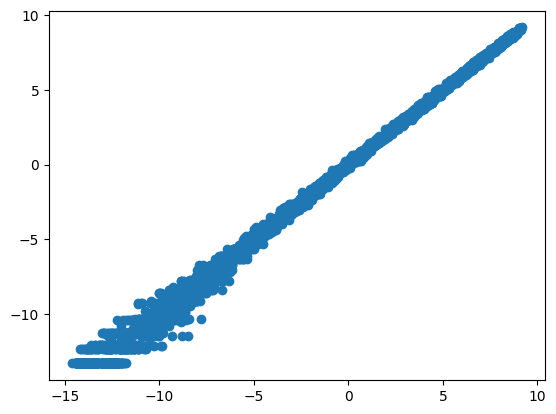

In [61]:
# make predictions on test data

water_test_pred_dt9 = make_predictions(X_water_test, y_water_test, 'water_dt9_model')
mae, mse, rmse, r2, metrics_row = water_test_pred_dt9


metrics = pd.concat([metrics, metrics_row], axis=0, ignore_index=True)
metrics

<h3>3.4b. Izopropanol decision tree regression</h3>

<h4>3.4b.1) Decision tree regresor with max_depth=3</h4>

Decission tree regression model with max_depth=3 is characterized with SCORE: 0.9337231659966289


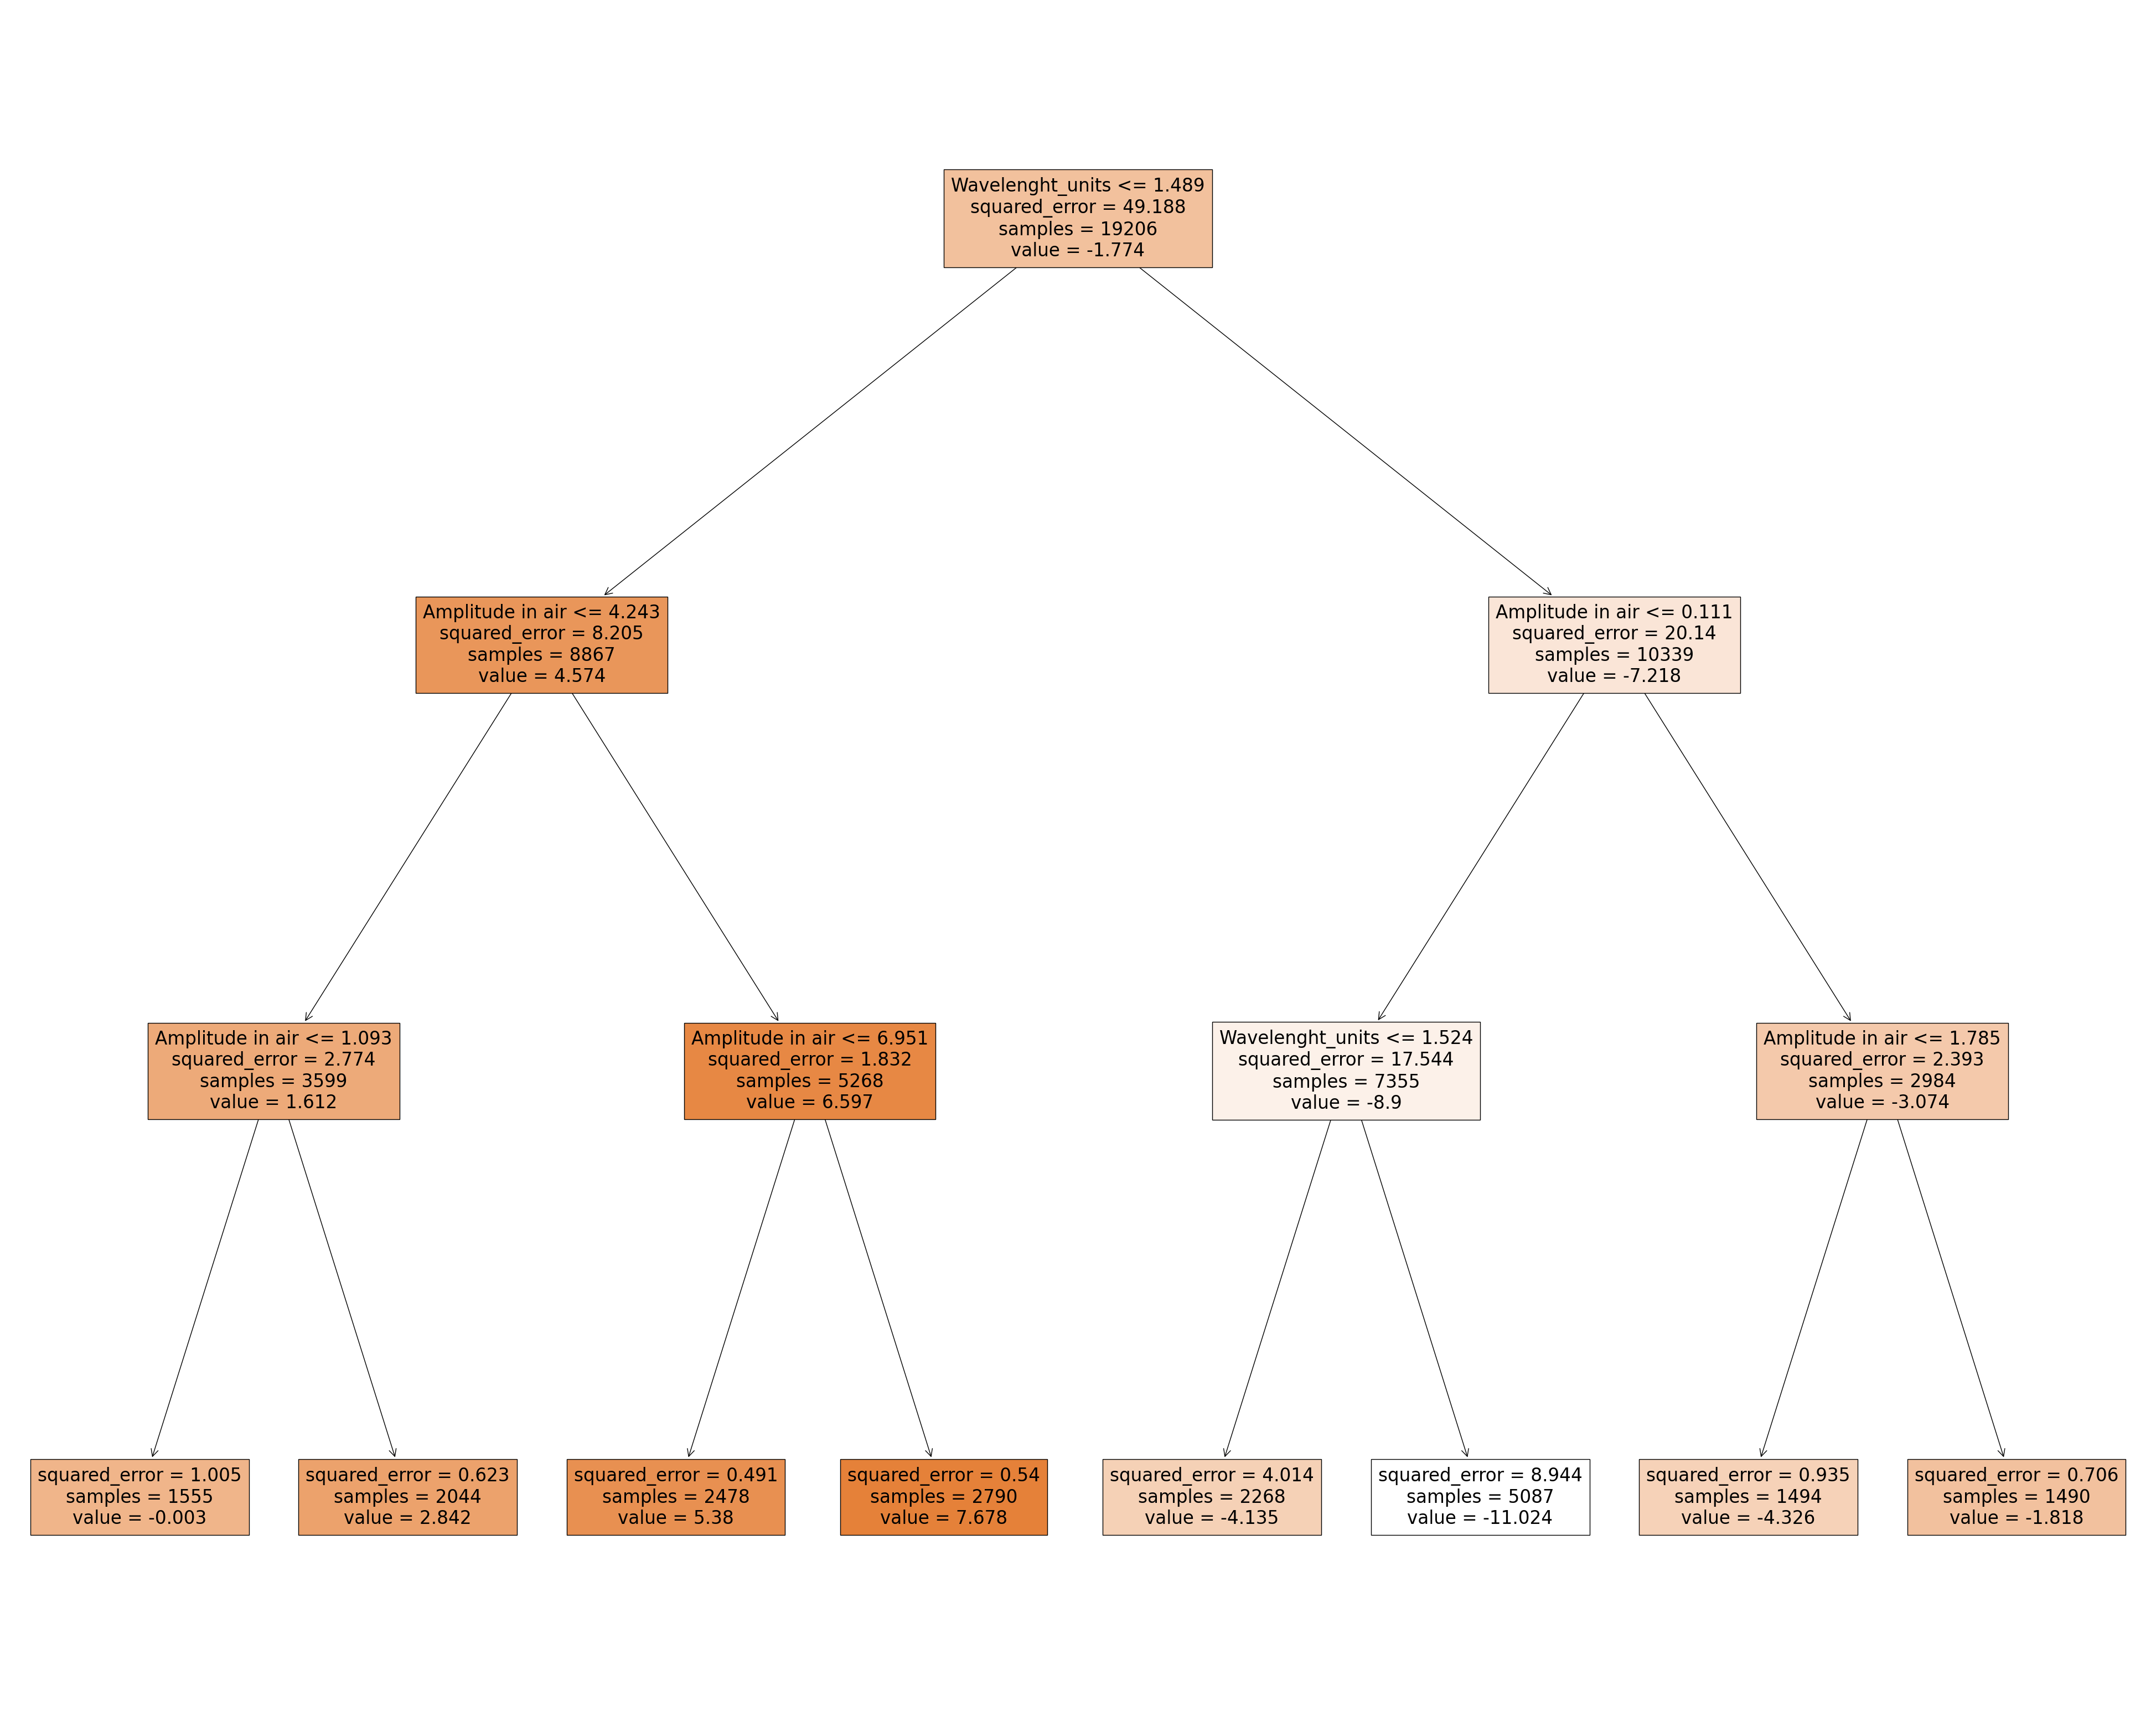

In [62]:
# model fit of izopropanol tree regression - MaxDepth = 3

izo_dt3 = dec_tree_model(X_izo_train, y_izo_train, 3, 'izo_dt3_model')

Parameters of model:
MAE: 1.310775222924516, MSE: 3.2600212280094074, RMSE: 1.8055528870707187, R2: 0.9337231659966289


Model Dataset        R2       MAE       MSE      RMSE
0       water_poly3    test  0.988600  0.493405  0.490444  0.700317
1       water_poly3   train  0.988939  0.495498  0.485628  0.696870
2       water_poly8   train  0.996825  0.249091  0.139412  0.373379
3       water_poly8    test  0.996932  0.242303  0.131972  0.363280
4         izo_poly3   train  0.983962  0.608194  0.788899  0.888200
5         izo_poly3    test  0.984341  0.595066  0.768942  0.876893
6        izo_poly10   train  0.995907  0.268504  0.201339  0.448708
7   izo_poly10_test    test  0.995830  0.267719  0.204773  0.452518
8        izo_poly10    test  0.995830  0.267719  0.204773  0.452518
9         water_dt3   train  0.943259  1.178636  2.491277  1.578378
10        water_dt3    test  0.943314  1.165746  2.438630  1.561611
11        water_dt9   train  0.997089  0.211009  0.127788  0.357474
12        water_dt9    test  0.996690  0.226422  0.142391  0.377347
13          izo_dt3   train  0.933723  1.310775  3.260021  1.805553

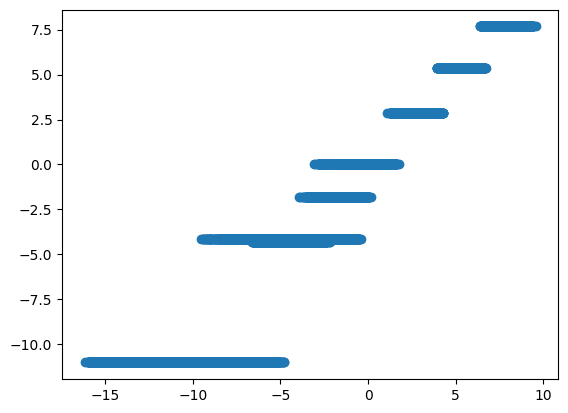

In [63]:
# make predictions on train data

izo_train_pred_dt3 = make_predictions(X_izo_train, y_izo_train, 'izo_dt3_model')
mae, mse, rmse, r2, metrics_row = izo_train_pred_dt3


metrics = pd.concat([metrics, metrics_row], axis=0, ignore_index=True)
metrics

Parameters of model:
MAE: 1.2872880878042265, MSE: 3.168772992558388, RMSE: 1.7801047701071946, R2: 0.9354694027197183


Model Dataset        R2       MAE       MSE      RMSE
0       water_poly3    test  0.988600  0.493405  0.490444  0.700317
1       water_poly3   train  0.988939  0.495498  0.485628  0.696870
2       water_poly8   train  0.996825  0.249091  0.139412  0.373379
3       water_poly8    test  0.996932  0.242303  0.131972  0.363280
4         izo_poly3   train  0.983962  0.608194  0.788899  0.888200
5         izo_poly3    test  0.984341  0.595066  0.768942  0.876893
6        izo_poly10   train  0.995907  0.268504  0.201339  0.448708
7   izo_poly10_test    test  0.995830  0.267719  0.204773  0.452518
8        izo_poly10    test  0.995830  0.267719  0.204773  0.452518
9         water_dt3   train  0.943259  1.178636  2.491277  1.578378
10        water_dt3    test  0.943314  1.165746  2.438630  1.561611
11        water_dt9   train  0.997089  0.211009  0.127788  0.357474
12        water_dt9    test  0.996690  0.226422  0.142391  0.377347
13          izo_dt3   train  0.933723  1.310775  3.260021  1.805553
14          izo_dt3    test  0.935469  1.287288  3.168773  1.780105

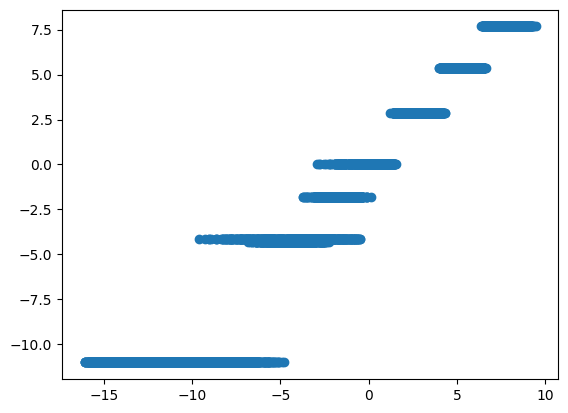

In [64]:
# predictions for test dataset
izo_test_pred_dt3 = make_predictions(X_izo_test, y_izo_test, 'izo_dt3_model')
mae, mse, rmse, r2, metrics_row = izo_test_pred_dt3


metrics = pd.concat([metrics, metrics_row], axis=0, ignore_index=True)
metrics

<h4>3.4b.2) Decision tree - hyperparameter tuning with GridSearch</h4>

In [65]:
gs = GridSearchCV(DecisionTreeRegressor(),
                  param_grid = {'max_depth': range(1, 10)
                                },
                  cv=20,
                  scoring='neg_mean_absolute_error')
gs.fit(X_izo_train,y_izo_train)

print(gs.best_params_)
print(gs.best_score_)

{'max_depth': 9}
-0.2564532312458887


Decission tree regression model with max_depth=9 is characterized with SCORE: 0.9963062367785266


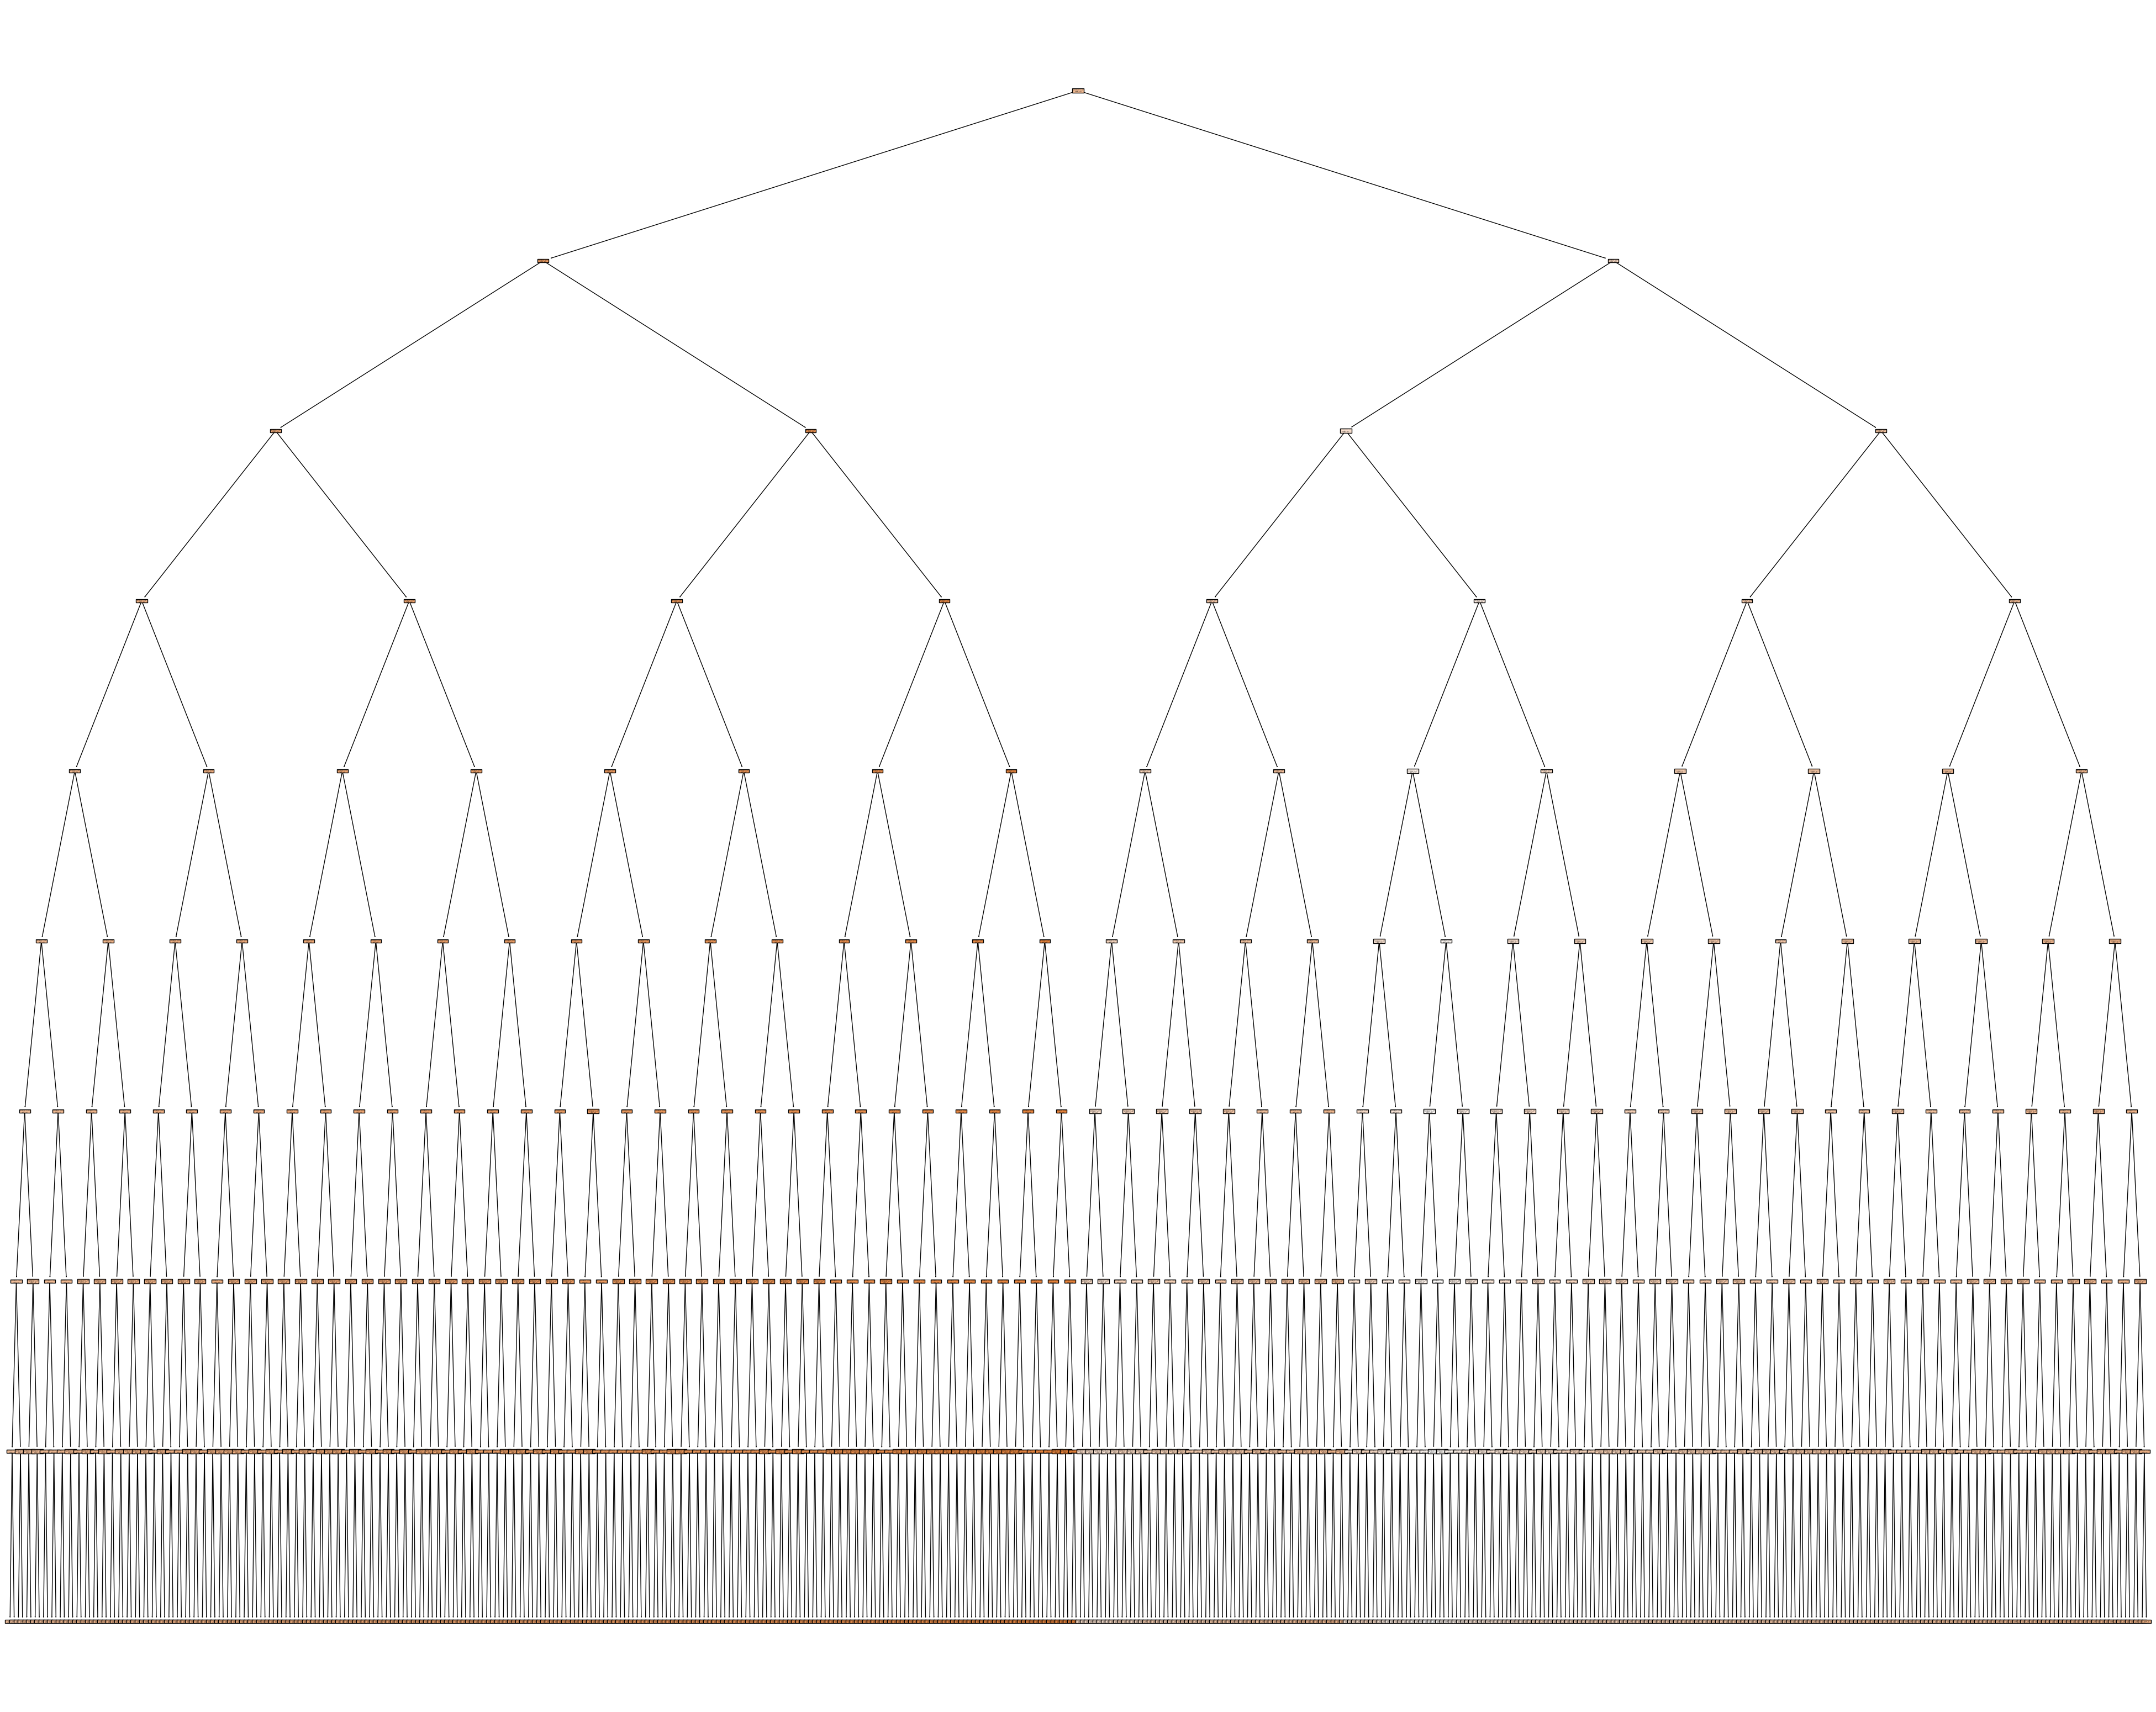

In [66]:
# model fit of izopropanol tree regression - MaxDepth = 9

izo_dt9 = dec_tree_model(X_izo_train, y_izo_train, 9, 'izo_dt9_model')

Parameters of model:
MAE: 0.23324348452623367, MSE: 0.18168862007849287, RMSE: 0.42624948103017424, R2: 0.9963062367785266


Model Dataset        R2       MAE       MSE      RMSE
0       water_poly3    test  0.988600  0.493405  0.490444  0.700317
1       water_poly3   train  0.988939  0.495498  0.485628  0.696870
2       water_poly8   train  0.996825  0.249091  0.139412  0.373379
3       water_poly8    test  0.996932  0.242303  0.131972  0.363280
4         izo_poly3   train  0.983962  0.608194  0.788899  0.888200
5         izo_poly3    test  0.984341  0.595066  0.768942  0.876893
6        izo_poly10   train  0.995907  0.268504  0.201339  0.448708
7   izo_poly10_test    test  0.995830  0.267719  0.204773  0.452518
8        izo_poly10    test  0.995830  0.267719  0.204773  0.452518
9         water_dt3   train  0.943259  1.178636  2.491277  1.578378
10        water_dt3    test  0.943314  1.165746  2.438630  1.561611
11        water_dt9   train  0.997089  0.211009  0.127788  0.357474
12        water_dt9    test  0.996690  0.226422  0.142391  0.377347
13          izo_dt3   train  0.933723  1.310775  3.260021  1.805553
14          izo_dt3    test  0.935469  1.287288  3.168773  1.780105
15          izo_dt9   train  0.996306  0.233243  0.181689  0.426249

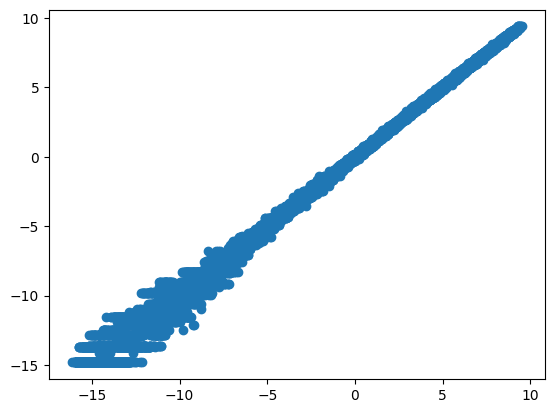

In [67]:
# make predictions on train data

izo_train_pred_dt9 = make_predictions(X_izo_train, y_izo_train, 'izo_dt9_model')
mae, mse, rmse, r2, metrics_row = izo_train_pred_dt9


metrics = pd.concat([metrics, metrics_row], axis=0, ignore_index=True)
metrics

Parameters of model:
MAE: 0.2561905448129196, MSE: 0.2131934199677599, RMSE: 0.4617287298487716, R2: 0.9956584145475066


Model Dataset        R2       MAE       MSE      RMSE
0       water_poly3    test  0.988600  0.493405  0.490444  0.700317
1       water_poly3   train  0.988939  0.495498  0.485628  0.696870
2       water_poly8   train  0.996825  0.249091  0.139412  0.373379
3       water_poly8    test  0.996932  0.242303  0.131972  0.363280
4         izo_poly3   train  0.983962  0.608194  0.788899  0.888200
5         izo_poly3    test  0.984341  0.595066  0.768942  0.876893
6        izo_poly10   train  0.995907  0.268504  0.201339  0.448708
7   izo_poly10_test    test  0.995830  0.267719  0.204773  0.452518
8        izo_poly10    test  0.995830  0.267719  0.204773  0.452518
9         water_dt3   train  0.943259  1.178636  2.491277  1.578378
10        water_dt3    test  0.943314  1.165746  2.438630  1.561611
11        water_dt9   train  0.997089  0.211009  0.127788  0.357474
12        water_dt9    test  0.996690  0.226422  0.142391  0.377347
13          izo_dt3   train  0.933723  1.310775  3.260021  1.805553
14          izo_dt3    test  0.935469  1.287288  3.168773  1.780105
15          izo_dt9   train  0.996306  0.233243  0.181689  0.426249
16          izo_dt9    test  0.995658  0.256191  0.213193  0.461729

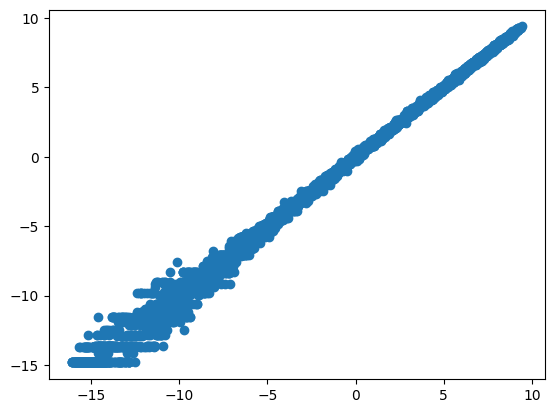

In [68]:
# predictions for test dataset
izo_test_pred_dt9 = make_predictions(X_izo_test, y_izo_test, 'izo_dt9_model')
mae, mse, rmse, r2, metrics_row = izo_test_pred_dt9


metrics = pd.concat([metrics, metrics_row], axis=0, ignore_index=True)
metrics

<h2>3.5. MODEL: autoML</h2>

AutoML model is not working, some libraries needs to be installed

flaml installation

In [501]:
!conda install flaml -c conda-forge

Solving environment: done

## Package Plan ##

  environment location: /Users/izabela_kania_ds/opt/anaconda3/envs/Industry4.0

  added / updated specs:
    - flaml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.12.7  |       h033912b_0         142 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    flaml-1.1.3                |     pyhd8ed1ab_0         159 KB  conda-forge
    lightgbm-3.3.5             |   py39hc23ddd4_0         1.0 MB  conda-forge
    openssl-1.1.1t             |       hfd90126_0         1.7 MB  conda-forge
    pandas-1.5.3               |   py39hecff1ad_0        10.7 MB  conda-forge
    python-dateutil-2.8.2      |     pyhd8ed1ab_0         240 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    pytz-2022.7.1              |     pyhd8ed1ab_0         182 KB  

<h3>3.5.A) AutoML - water</h3>

In [69]:
# Train a model with FLAML
from flaml import AutoML



# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # total running time in seconds
    "metric": 'r2',  # primary metrics for regression can be chosen from: ['mae','mse','r2','rmse','mape']
    "task": 'regression',  # task type
    "log_file_name": 'Industry40_water_experiment.log',  # flaml log file
    "seed": 40,    # random seed
}
# Train with labeled input data

#water
automl.fit(X_train=X_water_train, y_train=y_water_train,
           **automl_settings)

# Predict
print(automl.predict(X_water_train))
# Print the best model
print(automl.model.estimator)

[flaml.automl.automl: 03-15 14:38:07] {2726} INFO - task = regression
[flaml.automl.automl: 03-15 14:38:07] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 03-15 14:38:07] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 03-15 14:38:07] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 03-15 14:38:07] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 03-15 14:38:07] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-15 14:38:07] {3472} INFO - Estimated sufficient time budget=917s. Estimated necessary time budget=6s.
[flaml.automl.automl: 03-15 14:38:07] {3519} INFO -  at 0.1s,	estimator lgbm's best error=0.4935,	best estimator lgbm's best error=0.4935
[flaml.automl.automl: 03-15 14:38:07] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 03-15 14:38:07] {3519} INFO -  at 0.2s,	estimator lgbm's best error=0.4935,	best estimator 

In [70]:
''' retrieve best config'''
print('Best hyperparmeter config:', automl.best_config)
print('Best r2 on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best hyperparmeter config: {'n_estimators': 79, 'num_leaves': 224, 'min_child_samples': 38, 'learning_rate': 1.0, 'log_max_bin': 7, 'colsample_bytree': 0.9680571840898778, 'reg_alpha': 0.009306533607865451, 'reg_lambda': 0.058205218662361335}
Best r2 on validation data: 0.9977
Training duration of best run: 0.9288 s


In [71]:
automl.model.estimator

LGBMRegressor(colsample_bytree=0.9680571840898778, learning_rate=1.0,
              max_bin=127, min_child_samples=38, n_estimators=79,
              num_leaves=224, reg_alpha=0.009306533607865451,
              reg_lambda=0.058205218662361335, verbose=-1)

In [72]:
''' pickle and save the automl object '''
import pickle
with open('water_automl.pkl', 'wb') as f:
    pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

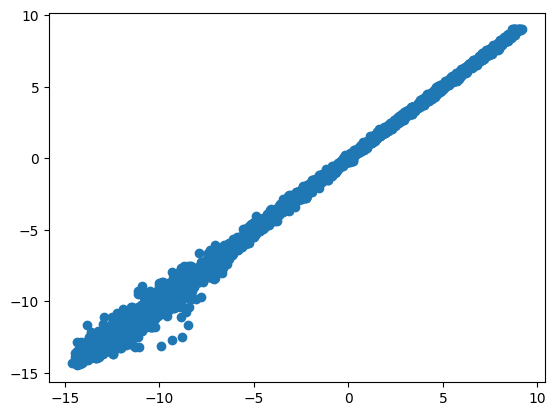

In [73]:
''' compute predictions of testing dataset ''' 
water_autoML_pred = automl.predict(X_water_test)

plt.scatter(y_water_test, water_autoML_pred)



In [74]:
''' compute different metric values on testing dataset'''
from flaml.ml import sklearn_metric_loss_score

r2= 1 - sklearn_metric_loss_score('r2', water_autoML_pred, y_water_test)
mae = sklearn_metric_loss_score('mae', water_autoML_pred, y_water_test)
mse = sklearn_metric_loss_score('mse', water_autoML_pred, y_water_test)
rmse = sklearn_metric_loss_score('rmse', water_autoML_pred, y_water_test)

metrics_row = pd.DataFrame({'Model':'water_autoML', 'Dataset':'test', 'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}, index=[0])


metrics = pd.concat([metrics, metrics_row], axis=0, ignore_index=True)
metrics


Model Dataset        R2       MAE       MSE      RMSE
0       water_poly3    test  0.988600  0.493405  0.490444  0.700317
1       water_poly3   train  0.988939  0.495498  0.485628  0.696870
2       water_poly8   train  0.996825  0.249091  0.139412  0.373379
3       water_poly8    test  0.996932  0.242303  0.131972  0.363280
4         izo_poly3   train  0.983962  0.608194  0.788899  0.888200
5         izo_poly3    test  0.984341  0.595066  0.768942  0.876893
6        izo_poly10   train  0.995907  0.268504  0.201339  0.448708
7   izo_poly10_test    test  0.995830  0.267719  0.204773  0.452518
8        izo_poly10    test  0.995830  0.267719  0.204773  0.452518
9         water_dt3   train  0.943259  1.178636  2.491277  1.578378
10        water_dt3    test  0.943314  1.165746  2.438630  1.561611
11        water_dt9   train  0.997089  0.211009  0.127788  0.357474
12        water_dt9    test  0.996690  0.226422  0.142391  0.377347
13          izo_dt3   train  0.933723  1.310775  3.260021  1.805553
14          izo_dt3    test  0.935469  1.287288  3.168773  1.780105
15          izo_dt9   train  0.996306  0.233243  0.181689  0.426249
16          izo_dt9    test  0.995658  0.256191  0.213193  0.461729
17     water_autoML    test  0.997734  0.176937  0.097498  0.312246

In [75]:
from flaml.data import get_output_from_log
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = \
    get_output_from_log(filename=automl_settings['log_file_name'], time_budget=60)

for config in config_history:
    print(config)

{'Current Learner': 'lgbm', 'Current Sample': 19206, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}}
{'Current Learner': 'lgbm', 'Current Sample': 19206, 'Current Hyper-parameters': {'n_estimators': 6, 'num_leaves': 4, 'min_child_samples': 17, 'learning_rate': 0.28233198301176254, 'log_max_bin': 7, 'colsample_bytree': 1.0, 'reg_alpha': 0.0013786142796446028, 'reg_lambda': 0.1699667077003888}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 6, 'num_leaves': 4, 'min_child_samples': 17, 'learning_rate': 0.28233198301176254, 'log_max_bin': 7, 'colsample_bytree': 1.0, 're

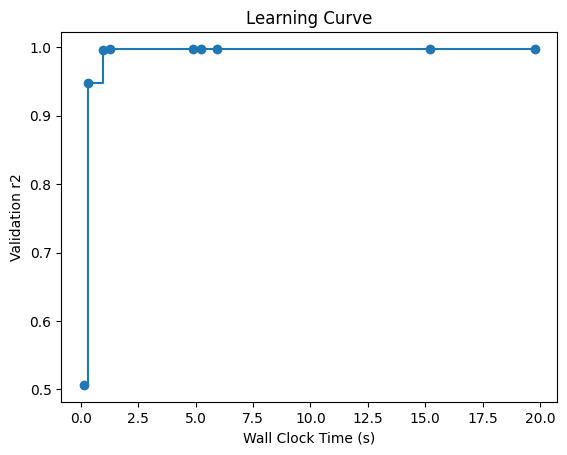

In [76]:
plt.title('Learning Curve')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation r2')
plt.scatter(time_history, 1 - np.array(valid_loss_history))
plt.step(time_history, 1 - np.array(best_valid_loss_history), where='post')
plt.show()

<h3>3.5.B) AutoML - izopropanopl</h3>

In [77]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # total running time in seconds
    "metric": 'r2',  # primary metrics for regression can be chosen from: ['mae','mse','r2','rmse','mape']
    "task": 'regression',  # task type
    "log_file_name": 'Industry40_izo_experiment.log',  # flaml log file
    "seed": 40,    # random seed
}

# Train with settings described in water model

#izopropanol
automl.fit(X_train=X_izo_train, y_train=y_izo_train,
           **automl_settings)

# Predict
print(automl.predict(X_izo_train))
# Print the best model
print(automl.model.estimator)

[flaml.automl.automl: 03-15 14:40:39] {2726} INFO - task = regression
[flaml.automl.automl: 03-15 14:40:39] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 03-15 14:40:39] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 03-15 14:40:39] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 03-15 14:40:39] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 03-15 14:40:39] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-15 14:40:39] {3472} INFO - Estimated sufficient time budget=850s. Estimated necessary time budget=6s.
[flaml.automl.automl: 03-15 14:40:39] {3519} INFO -  at 0.1s,	estimator lgbm's best error=0.4948,	best estimator lgbm's best error=0.4948
[flaml.automl.automl: 03-15 14:40:39] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 03-15 14:40:39] {3519} INFO -  at 0.2s,	estimator lgbm's best error=0.4948,	best estimator 

In [78]:
''' retrieve best config'''
print('Best hyperparmeter config:', automl.best_config)
print('Best r2 on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best hyperparmeter config: {'n_estimators': 282, 'max_features': 1.0, 'max_leaves': 595}
Best r2 on validation data: 0.9972
Training duration of best run: 0.3884 s


In [79]:
automl.model.estimator

ExtraTreesRegressor(max_leaf_nodes=595, n_estimators=282, n_jobs=-1,
                    random_state=12032022)

In [80]:
''' pickle and save the automl object '''
import pickle
with open('izopropanol_automl.pkl', 'wb') as f:
    pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

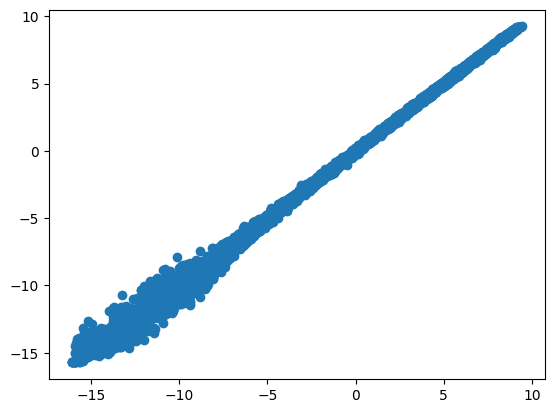

In [81]:
''' compute predictions of testing dataset ''' 
izo_autoML_pred = automl.predict(X_izo_test)

plt.scatter(y_izo_test, izo_autoML_pred)



In [82]:
''' compute different metric values on testing dataset'''
from flaml.ml import sklearn_metric_loss_score

r2= 1 - sklearn_metric_loss_score('r2', izo_autoML_pred, y_izo_test)
mae = sklearn_metric_loss_score('mae', izo_autoML_pred, y_izo_test)
mse = sklearn_metric_loss_score('mse', izo_autoML_pred, y_izo_test)
rmse = sklearn_metric_loss_score('rmse', izo_autoML_pred, y_izo_test)

metrics_row = pd.DataFrame({'Model':'izo_autoML', 'Dataset':'test', 'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}, index=[0])


metrics = pd.concat([metrics, metrics_row], axis=0, ignore_index=True)
metrics


Model Dataset        R2       MAE       MSE      RMSE
0       water_poly3    test  0.988600  0.493405  0.490444  0.700317
1       water_poly3   train  0.988939  0.495498  0.485628  0.696870
2       water_poly8   train  0.996825  0.249091  0.139412  0.373379
3       water_poly8    test  0.996932  0.242303  0.131972  0.363280
4         izo_poly3   train  0.983962  0.608194  0.788899  0.888200
5         izo_poly3    test  0.984341  0.595066  0.768942  0.876893
6        izo_poly10   train  0.995907  0.268504  0.201339  0.448708
7   izo_poly10_test    test  0.995830  0.267719  0.204773  0.452518
8        izo_poly10    test  0.995830  0.267719  0.204773  0.452518
9         water_dt3   train  0.943259  1.178636  2.491277  1.578378
10        water_dt3    test  0.943314  1.165746  2.438630  1.561611
11        water_dt9   train  0.997089  0.211009  0.127788  0.357474
12        water_dt9    test  0.996690  0.226422  0.142391  0.377347
13          izo_dt3   train  0.933723  1.310775  3.260021  1.805553
14          izo_dt3    test  0.935469  1.287288  3.168773  1.780105
15          izo_dt9   train  0.996306  0.233243  0.181689  0.426249
16          izo_dt9    test  0.995658  0.256191  0.213193  0.461729
17     water_autoML    test  0.997734  0.176937  0.097498  0.312246
18       izo_autoML    test  0.997285  0.201976  0.133336  0.365152

In [83]:
from flaml.data import get_output_from_log
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = \
    get_output_from_log(filename=automl_settings['log_file_name'], time_budget=60)

for config in config_history:
    print(config)

{'Current Learner': 'lgbm', 'Current Sample': 19206, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}}
{'Current Learner': 'lgbm', 'Current Sample': 19206, 'Current Hyper-parameters': {'n_estimators': 6, 'num_leaves': 4, 'min_child_samples': 17, 'learning_rate': 0.28233198301176254, 'log_max_bin': 7, 'colsample_bytree': 1.0, 'reg_alpha': 0.0013786142796446028, 'reg_lambda': 0.1699667077003888}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 6, 'num_leaves': 4, 'min_child_samples': 17, 'learning_rate': 0.28233198301176254, 'log_max_bin': 7, 'colsample_bytree': 1.0, 're

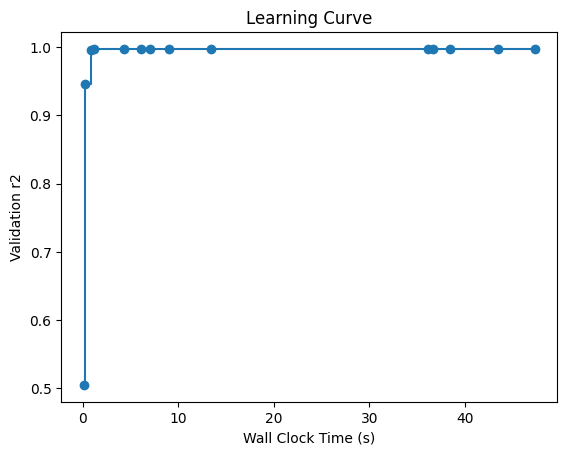

In [84]:
plt.title('Learning Curve')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation r2')
plt.scatter(time_history, 1 - np.array(valid_loss_history))
plt.step(time_history, 1 - np.array(best_valid_loss_history), where='post')
plt.show()

<h1>4. Spectral characterization of sensors (for future working)</h1>

Analysis of the produced sensors spectral characteristic is a part of the quality control. Collected data of spectral measurements represents characteristic of correct sensors and it will be a reference standard.



<h2>4.1. Import Data and prepare datasets</h2>

Import data from readouts and prepare datasets for air, water and izopropanol separately. amplitude readouts from each sensor will be appended in separated columns.